# 概览(Brief):20241030

In [1]:
repday='20241030'
lastday='20241029'

## 1. 新闻
###  1.1 新浪财经首页截屏

In [2]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service as EdgeService
from webdriver_manager.microsoft import EdgeChromiumDriverManager
import time
import os

#sina.png保存首页财经新闻截图
def getSinaShot():
    sinafile='sina.png'
    if not os.path.exists(sinafile):
        driver = webdriver.Edge(service=EdgeService(EdgeChromiumDriverManager().install()))
        driver.implicitly_wait(10)
        driver.get("https://finance.sina.com.cn")
        time.sleep(5)
        popup=driver.find_element(By.CLASS_NAME,"SNP-layer")
        if popup:
            driver.find_element(By.CLASS_NAME,"snp-btn-close-new").click()

        #移动到新闻关键页面位置
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight/20);")
        driver.save_screenshot(sinafile)
        driver.close()
    
getSinaShot()

![首页新闻](sina.png)

### 1.2 东方财富国内早盘新闻 

In [3]:
import akshare as ak
from datetime import datetime, time
import pandas as pd

news_dfgn = ak.stock_info_cjzc_em()
news_dfgn['发布时间']=pd.to_datetime(news_dfgn['发布时间'])
news_dfgn[news_dfgn['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,东方财富财经早餐 11月7日周四,【财经早餐】1、特朗普宣布在2024年美国总统选举中获胜。2、工信部对新型储能制造业高质量发...,2024-11-07 06:00:40,http://finance.eastmoney.com/a/202411063231504...
1,东方财富财经早餐 11月6日周三,【财经早餐】1、李强出席第七届中国国际进口博览会开幕式并发表主旨演讲。2、央行行长潘功胜：加...,2024-11-06 06:00:55,http://finance.eastmoney.com/a/202411053230012...
2,东方财富财经早餐 11月5日周二,【财经早餐】1、全国人大常委会审议增加地方政府债务限额置换存量隐性债务的议案。2、国资委：确...,2024-11-05 06:00:20,http://finance.eastmoney.com/a/202411053228604...
3,东方财富财经早餐 11月4日周一,【财经早餐】1、六部门：允许外国自然人战略投资，持股锁定最少12个月。2、上交所：始终对各类...,2024-11-04 06:00:11,http://finance.eastmoney.com/a/202411043227366...
4,东方财富财经早餐 11月1日周五,【财经早餐】1、《求是》杂志发表习近平总书记重要文章《促进高质量充分就业》。2、央行：10月...,2024-11-01 06:00:16,http://finance.eastmoney.com/a/202410313225146...
5,东方财富财经早餐 10月31日周四,【财经早餐】1、国家发展改革委等六部门：大力实施可再生能源替代行动。2、深交所召开创业板高质...,2024-10-31 06:00:04,http://finance.eastmoney.com/a/202410313223659...
6,东方财富财经早餐 10月30日周三,【财经早餐】1、美方发布对华投资限制规则，外交部：强烈不满，已提出交涉。2、欧盟决定对中国电...,2024-10-30 06:00:29,http://finance.eastmoney.com/a/202410303222008...
7,东方财富财经早餐 10月29日周二,【财经早餐】1、国务院发布一系列生育支持措施，推动建设生育友好型社会。2、央行决定启用公开市...,2024-10-29 06:00:25,http://finance.eastmoney.com/a/202410293220194...


### 1.3 东方财富国际新闻

In [4]:
news_dfgj = ak.stock_info_global_em()
news_dfgj['发布时间']=pd.to_datetime(news_dfgj['发布时间'])
news_dfgj[news_dfgj['发布时间']>lastday]

,标题,摘要,发布时间,链接
0,港股午评：恒指涨1.16% 恒生科技指数涨0.99% 航空、石油、内房股涨幅居前,【港股午评：恒指涨1.16% 恒生科技指数涨0.99% 航空、石油、内房股涨幅居前】11月7...,2024-11-07 12:08:10,https://finance.eastmoney.com/a/20241107323243...
1,乘联分会崔东树：2024年全年新能源乘用车国内销量预计1068万辆 同比增长38%,【乘联分会崔东树：2024年全年新能源乘用车国内销量预计1068万辆 同比增长38%】乘联分...,2024-11-07 12:03:33,https://finance.eastmoney.com/a/20241107323243...
2,淡马锡狄澜：中国政府致力于稳定经济、促进增长 市场反应积极,【淡马锡狄澜：中国政府致力于稳定经济、促进增长 市场反应积极】淡马锡控股执行董事兼首席执行官...,2024-11-07 12:02:10,https://finance.eastmoney.com/a/20241107323243...
3,11月7日午间涨停分析,【11月7日午间涨停分析】今日午盘全市场共126股涨停，连板股总数42只，45股封板未遂，封...,2024-11-07 11:54:37,https://finance.eastmoney.com/a/20241107323243...
4,抖音加大整治“荐股”账号 有博主“换马甲”后再被封,【抖音加大整治“荐股”账号 有博主“换马甲”后再被封】抖音近期加大力度整治荐股账号，有博主换...,2024-11-07 11:54:09,https://finance.eastmoney.com/a/20241107323243...
...,...,...,...,...
195,工信部：到2027年 新型储能领域培育千亿元以上规模的生态主导型企业3—5家,【工信部：到2027年 新型储能领域培育千亿元以上规模的生态主导型企业3—5家】11月6日，...,2024-11-07 02:01:32,https://finance.eastmoney.com/a/20241107323152...
196,LME金属期货收盘涨跌不一,【LME金属期货收盘涨跌不一】LME金属期货收盘涨跌不一，LME期铜收跌396美元，报934...,2024-11-07 01:58:30,https://finance.eastmoney.com/a/20241107323151...
197,沙特计划斥资1000亿美元打造人工智能中心,沙特计划斥资1000亿美元打造人工智能中心，以媲美阿联酋的科技中心。,2024-11-07 01:58:00,https://finance.eastmoney.com/a/20241107323151...
198,美国基准市政债券的收益率一度上涨将近15个基点,美国基准市政债券的收益率一度上涨将近15个基点，特朗普胜选让投资者对美国联邦政府扩大财政赤字...,2024-11-07 01:52:27,https://finance.eastmoney.com/a/20241107323151...


### 1.4 新浪国际财经

In [5]:
news_sinagj = ak.stock_info_global_sina()
news_sinagj['时间']=pd.to_datetime(news_sinagj['时间'])
news_sinagj[news_sinagj['时间']>lastday]

,时间,内容
0,2024-11-07 12:07:12,【俄罗斯勇士飞行表演队抵达太原】今天，俄罗斯“勇士”飞行表演队6架苏-35S战机、1架苏-3...
1,2024-11-07 12:06:07,【印尼勒沃托比火山喷发 火山灰柱高达5000米】据印尼火山地质研究机构（PVMBG）消息，当...
2,2024-11-07 12:03:08,【乘联分会崔东树：2024年全年新能源乘用车国内销量预计1068万辆 同比增长38%】乘联分...
3,2024-11-07 12:02:49,【开山股份：收到肯尼亚Sosian Menengai地热项目剩余EPC合同款5700万美元】...
4,2024-11-07 12:02:36,【欧盟机构：2024年将成为有记录以来最热年份】欧盟气候监测机构哥白尼气候变化服务局7日说，...
5,2024-11-07 12:01:49,【IDC：2028年中国数字化转型总体市场规模将超7300亿美元】 IDC最新数据显示，20...
6,2024-11-07 12:01:34,小鹏汽车：小鹏P7+预售订单再创历史新高。已于10月31日打破小鹏MONA所创记录。小鹏P7...
7,2024-11-07 12:01:09,【港股午评：恒生指数涨0.88% 恒生科技指数涨0.82%】 港股午间收盘，恒生指数涨0.8...
8,2024-11-07 12:00:27,【克林顿夫妇祝贺特朗普当选：希望你为全体美国人民执政】 当地时间11月6日，美国前总统比尔·...
9,2024-11-07 12:00:10,摩根士丹利的Christopher Metli在周三给客户的一份报告中写道，利用衍生品为特定...


## 2. 市场趋势
### 2.1 富时50、中证50


### 2.1 港股
恒生指数（HSI）最近30天

In [6]:
stock_hk_daily_hfq_df = ak.stock_hk_daily(symbol="HSI", adjust="")
stock_hk_daily_hfq_df

,date,open,high,low,close,volume
0,2013-08-20,22396.289,22481.740,21907.211,21964.051,6.352194e+10
1,2013-08-21,21964.689,21970.250,21618.600,21817.730,7.237452e+09
2,2013-08-22,21538.189,21944.471,21538.189,21895.400,8.229203e+09
3,2013-08-23,22006.410,22103.900,21769.039,21863.510,7.544465e+09
4,2013-08-26,21943.400,22116.000,21898.150,22005.320,7.672642e+09
...,...,...,...,...,...,...
2756,2024-10-31,20414.200,20553.300,20317.330,20317.330,1.642446e+10
2757,2024-11-01,20427.880,20667.220,20353.340,20506.430,1.389824e+10
2758,2024-11-04,20584.450,20633.580,20446.260,20567.520,1.238359e+10
2759,2024-11-05,20409.940,21006.970,20409.940,21006.969,1.750097e+10


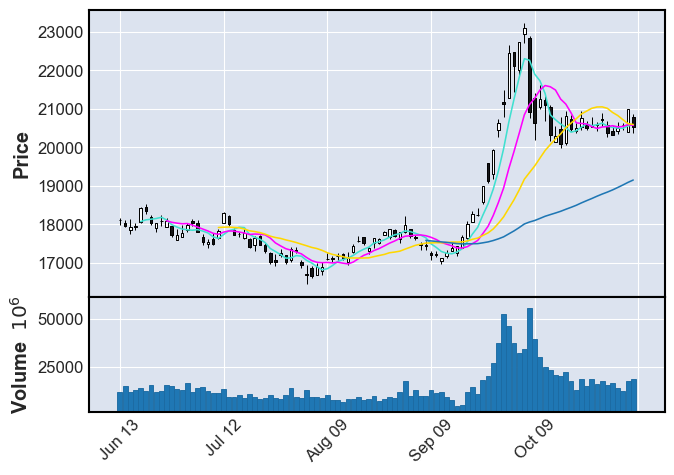

In [7]:
import mplfinance as mpf
import pandas as pd

# plot the stock DataFrame
# df: the DataFrame
# OCHLDict: {'columnName in Oiginal DF':'standard OCHLV names (initial capital)'}
def plotStock(df,OCHLVDict):
    #column
    gt_ul_index_plot=df.rename(columns=OCHLVDict)
    gt_ul_index_plot['Date']=pd.to_datetime(gt_ul_index_plot['Date'])
    gt_ul_index_plot=gt_ul_index_plot.set_index('Date')
    mpf.plot(gt_ul_index_plot,type='candle',volume=True,mav=(5,10,20,60,120,250))

#plot sina stock chart
def plotSinaStock(df,days):
    OCHLVDict={}
    for key in df.columns.to_list():
        new_key = key[0].upper() + key[1:].lower()
        OCHLVDict[key] = new_key
    plotStock(df.tail(days),OCHLVDict)
    
plotSinaStock(stock_hk_daily_hfq_df,100)

### 2.2 美国道琼斯

In [8]:
stock_dji_daily_df = ak.stock_us_daily(symbol=".DJI", adjust="")
stock_dji_daily_df

,date,open,high,low,close,volume
0,2004-01-02,10452.7402,10554.9600,10367.4102,10409.8496,168890000.0
1,2004-01-05,10411.8496,10575.9199,10411.8496,10544.0703,221290000.0
2,2004-01-06,10543.8496,10584.0703,10454.3701,10538.6602,191460000.0
3,2004-01-07,10535.4600,10587.5498,10432.0000,10529.0303,225490000.0
4,2004-01-08,10530.0703,10651.9902,10480.5898,10592.4404,237770000.0
...,...,...,...,...,...,...
5245,2024-10-31,41956.3398,41991.9102,41704.6289,41763.4609,523873896.0
5246,2024-11-01,41869.8203,42326.3086,41869.8203,42052.1914,531359667.0
5247,2024-11-04,42004.6602,42035.8711,41647.3008,41794.6016,341507920.0
5248,2024-11-05,41835.4883,42258.8398,41766.9609,42221.8789,283999978.0


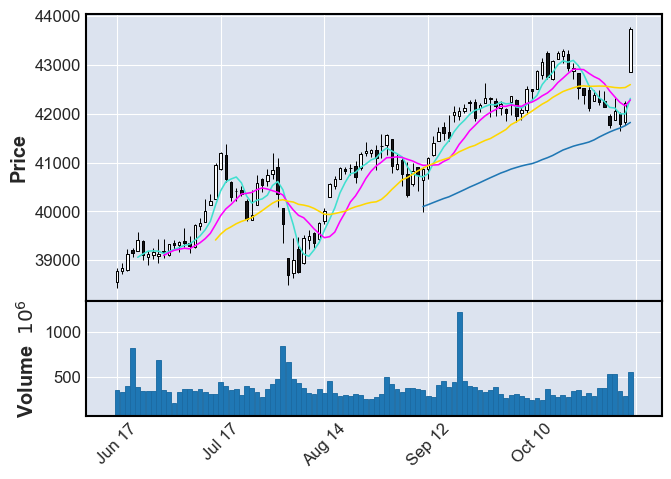

In [9]:
plotSinaStock(stock_dji_daily_df,100)

### 2.3 美国纳斯达克

In [10]:
stock_nasdaq_daily_df = ak.stock_us_daily(symbol=".IXIC", adjust="")
stock_nasdaq_daily_df

,date,open,high,low,close,volume
0,2004-01-02,2011.0800,2022.3700,1999.7700,2006.6801,1.666780e+09
1,2004-01-05,2020.7800,2047.3600,2020.7800,2047.3600,2.362910e+09
2,2004-01-06,2044.5500,2061.5400,2039.6300,2057.3701,2.273220e+09
3,2004-01-07,2056.7500,2078.0901,2047.0200,2077.6799,2.294280e+09
4,2004-01-08,2089.6001,2100.2500,2078.0500,2100.2500,2.683950e+09
...,...,...,...,...,...,...
5243,2024-10-31,18427.3105,18427.3105,18083.9512,18095.1504,4.973565e+09
5244,2024-11-01,18189.6660,18363.9434,18181.5312,18239.9180,5.089374e+09
5245,2024-11-04,18220.4258,18308.3008,18112.8301,18179.9844,4.758359e+09
5246,2024-11-05,18250.7070,18449.6758,18250.7070,18439.1699,6.397392e+09


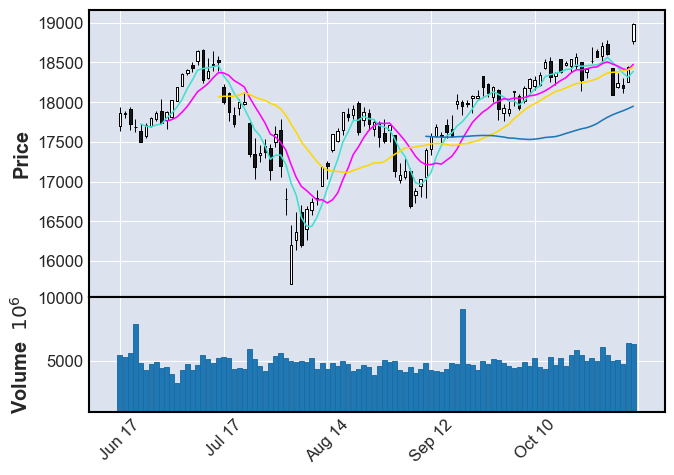

In [11]:
plotSinaStock(stock_nasdaq_daily_df,100)

## 3. 板块热点
### 2.1 昨日热点10大板块
昨天涨停股票分布的板块

In [12]:
#返回当日涨停股票DataFrame
def limitupList(date):
    collist=['所属行业','代码','名称','涨跌幅','首次封板时间','最后封板时间','炸板次数','涨停统计','连板数']
    stock_zt_pool_em_df = ak.stock_zt_pool_em(date=date)
    last_hs_10=stock_zt_pool_em_df[collist]
    return last_hs_10

last_hs_10=limitupList(lastday)
last_hs_10

,所属行业,代码,名称,涨跌幅,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数
0,通信设备,002583,海能达,10.004720,092500,092500,0,24/20,8
1,电力行业,000958,电投产融,10.055097,092500,092500,0,7/7,7
2,环保行业,002717,岭南股份,10.108303,092500,093636,3,6/5,4
3,工程建设,002542,中化岩土,10.062893,092500,092500,0,10/8,4
4,家电行业,000016,深康佳Ａ,10.018904,092500,092500,0,16/8,4
...,...,...,...,...,...,...,...,...,...
127,汽车零部,600698,湖南天雁,10.036496,143135,143135,0,1/1,1
128,专用设备,002611,东方精工,10.077519,143506,143506,0,1/1,1
129,中药,300147,香雪制药,20.000000,143645,143645,0,2/2,2
130,消费电子,603890,春秋电子,9.965338,145442,145442,0,1/1,1


热点追踪：涨停行业汇总明细

In [13]:
grouped_df=last_hs_10.groupby('所属行业',observed=False).size().reset_index(name='计数')
grouped_df['占比']=grouped_df['计数']/grouped_df['计数'].sum()

sort_df=grouped_df.sort_values(by='计数', ascending=False)
sort_df.head(20)

,所属行业,计数,占比
29,汽车零部,9,0.068182
0,专用设备,7,0.053030
46,软件开发,7,0.053030
5,光学光电,7,0.053030
30,消费电子,6,0.045455
14,商业百货,6,0.045455
33,环保行业,5,0.037879
23,文化传媒,5,0.037879
2,互联网服,5,0.037879
7,农牧饲渔,4,0.030303


In [14]:
top_10 = sort_df.head(10)
total_cumulative = top_10['占比'].sum()
judge='集中' if total_cumulative>0.5 else '不集中'
print(f'前10板块涨幅靠前累计占比：{total_cumulative}, 热点{judge}。')

前10板块涨幅靠前累计占比：0.46212121212121215, 热点不集中。


### 2.2 今日热点
  
![今日涨幅国泰君安APP](gtja.png)

#### 2.2.1 集合竞价概念板块排名

In [15]:
#记录排名
# basename: 板块类型（概念板块、行业板块）
# start_time, end_time: 排名时间段
# sector: 板块名称
def recordRank(basename,start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'{basename}{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        if basename=='conceptRank':
            rank=ak.stock_board_concept_name_em()
        elif basename=='industryRank':
            rank=ak.stock_board_industry_name_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('非指定时间段，没有数据源.')
            rank=pd.DataFrame()
    if not rank.empty:
        mvtotal=rank['总市值'].sum()
        rank['市值比']=rank['总市值']/mvtotal
        rank['上涨家数%']=rank['上涨家数']/(rank['上涨家数']+rank['下跌家数'])
        columns=['排名','板块名称','板块代码','涨跌幅','市值比','换手率','上涨家数%','领涨股票','领涨股票-涨跌幅']
        rank=rank[columns]
    return rank

#排名靠前的板块的股票明细排名
# sectorRankDf: 板块排名DataFrame(recordRank生成)
# sectorNum,stockNum: 返回板块数、股票数
def top5sectorStocks(basename,start_time,end_time,sectorRankDf,sectorNum=5,stockNum=5):
    top5={}
    now = datetime.now()
    tStr = start_time.strftime("%Y%m%d%H%M")
    if sectorRankDf.empty:
        print('非指定时间段，没有数据源。')
    else:
        print('排名前5领涨板块成分股列表。')
        for sym in sectorRankDf['板块名称'].to_list()[:5]:
            csvfile=f'{basename}_{sym}{tStr}.txt'
            if now.time() < end_time and now.time() >= start_time:
                if basename=='conceptRank':
                    top5[sym]=ak.stock_board_concept_cons_em(sym)
                else:
                    top5[sym]=ak.stock_board_industry_cons_em(sym)
                top5[sym].to_csv(csvfile)
            else:
                if os.path.exists(csvfile):
                    top5[sym]=pd.read_csv(csvfile)
                else:
                    print('No record stored and not available from source.')
                    top5[sym]=pd.DataFrame()

            if not top5[sym].empty:
                atotal=top5[sym]['成交额'].sum()
                top5[sym]['成交额比']=top5[sym]['成交额']/atotal
                columns=['代码','名称','涨跌幅','成交额','换手率','市盈率-动态','市净率']
                top5[sym]=top5[sym][columns][:stockNum]
                print(f'板块：{sym}:\n{top5[sym]}\n\n')
    return top5   

In [16]:
#当天集合竞价阶段概念板块排名
basename='conceptRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank0=recordRank(basename,start_time,end_time)
rank0.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,昨日涨停,BK0815,9.96,0.000813,0.0,0.982301,安徽凤凰,30.00
1,2,昨日涨停_含一字,BK1050,8.90,0.001012,0.0,0.984733,豆神教育,20.03
2,3,昨日连板,BK0816,8.62,0.000285,0.0,1.000000,恒合股份,29.87
3,4,昨日连板_含一字,BK1051,8.15,0.000530,0.0,1.000000,豆神教育,20.03
4,5,智谱AI,BK1182,3.50,0.000236,0.0,0.592593,豆神教育,20.03
5,6,3D摄像头,BK0901,2.40,0.000384,0.0,0.750000,欧菲光,10.01
6,7,核污染防治,BK0983,2.21,0.000255,0.0,0.521739,汉威科技,19.99
7,8,屏下摄像,BK0947,2.09,0.000327,0.0,0.750000,欧菲光,10.01
8,9,AIPC,BK1164,2.07,0.000538,0.0,0.588235,智立方,20.00
9,10,财税数字化,BK1176,1.66,0.000318,0.0,0.531250,豆神教育,20.03


In [17]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank0)

排名前5领涨板块成分股列表。
板块：昨日涨停:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0  832000  安徽凤凰  30.00  NaN  0.0   24.31  2.87
1  833075   柏星龙  30.00  NaN  0.0   43.45  5.57
2  873223  荣亿精密  29.99  NaN  0.0  -72.59  7.33
3  832145  恒合股份  29.87  NaN  0.0 -103.74  4.93
4  831641   格利尔  29.65  NaN  0.0 -221.88  5.06


板块：昨日涨停_含一字:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  300010  豆神教育  20.03  NaN  0.0  134.06  18.27
1  300271  华宇软件  20.00  NaN  0.0  -23.43   2.03
2  300781  因赛集团  19.99  NaN  0.0  217.81  14.76
3  300968  格林精密  19.99  NaN  0.0  106.08   3.54
4  301008  宏昌科技  19.98  NaN  0.0   57.38   3.17


板块：昨日连板:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0  832145  恒合股份  29.87  NaN  0.0 -103.74  4.93
1  870204  沪江材料  22.73  NaN  0.0   72.99  5.42
2    2717  岭南股份  10.16  NaN  0.0  -11.38  3.07
3    2570   贝因美  10.10  NaN  0.0   58.26  3.90
4  834770   艾能聚  10.07  NaN  0.0   80.45  7.48


板块：昨日连板_含一字:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  300010  豆神教育  20.03  NaN  0.0  1

#### 2.2.3 开盘后15分钟概念板块排名

In [18]:
start_time = time(9, 31)
end_time = time(9, 52)
rank1=recordRank(basename,start_time,end_time)
rank1.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,机器人执行器,BK1145,7.90,0.000223,1.53,1.000000,英洛华,9.96
1,2,减速器,BK1100,7.29,0.000265,1.96,0.981481,英洛华,9.96
2,3,麒麟电池,BK1092,5.08,0.000780,1.59,1.000000,富临精工,15.56
3,4,机器视觉,BK0998,4.59,0.000243,2.06,0.923077,新时达,9.97
4,5,3D玻璃,BK0881,4.57,0.000178,2.68,0.944444,华映科技,10.02
5,6,工业母机,BK1004,4.13,0.000748,1.65,0.926829,科力尔,9.98
6,7,华为汽车,BK0984,4.11,0.000977,1.50,0.938776,蓝黛科技,10.01
7,8,人脑工程,BK0706,3.72,0.000188,1.51,0.950000,机器人,20.03
8,9,机器人概念,BK1090,3.63,0.003183,1.50,0.897436,英洛华,9.96
9,10,轮毂电机,BK1099,3.61,0.000035,0.86,1.000000,八方股份,9.98


排名前5概念板块领涨成分股

In [19]:
top5_concept_stocks=top5sectorStocks(basename,start_time,end_time,rank1)

排名前5领涨板块成分股列表。
板块：机器人执行器:
       代码    名称    涨跌幅           成交额    换手率  市盈率-动态   市净率
0  688017  绿的谐波  15.37  4.004857e+08   2.44  219.66  8.50
1  688160  步科股份  14.68  9.421536e+07   2.35   96.23  5.47
2  300503  昊志机电  12.29  4.653311e+08  11.04   51.63  4.69
3  300660  江苏雷利  11.59  2.819893e+08   2.90   30.94  2.94
4  301368  丰立智能  10.61  4.098277e+08  12.24  302.67  6.54


板块：减速器:
       代码    名称    涨跌幅           成交额    换手率  市盈率-动态    市净率
0  430510  丰光精密  20.28  1.314146e+08   6.80  142.12  10.39
1  300539  横河精密  20.02  7.589046e+07   3.62   84.09   4.96
2  301596  瑞迪智驱  20.00  3.618236e+08  25.33   60.25   7.34
3  300432  富临精工  15.49  7.586380e+08   4.33   43.74   4.17
4  688017  绿的谐波  15.37  4.004857e+08   2.44  219.66   8.50


板块：麒麟电池:
       代码    名称    涨跌幅           成交额   换手率  市盈率-动态   市净率
0  300432  富临精工  15.49  7.586380e+08  4.33   43.74  4.17
1  300337  银邦股份  12.58  9.278986e+08  7.50  100.28  8.46
2  301268   铭利达   3.43  1.129087e+07  0.34  -57.38  3.29
3  300602   飞荣达   3.38 

#### 2.2.3 集合竞价行业板块涨跌幅

In [20]:
#当天集合竞价到开盘后30分钟涨跌幅排名
basename='industryRank'
start_time = time(9, 15)
end_time = time(9, 31)
rank3=recordRank(basename,start_time,end_time)
rank3.head(20)

,排名,板块名称,板块代码,涨跌幅,市值比,换手率,上涨家数%,领涨股票,领涨股票-涨跌幅
0,1,工程机械,BK0739,2.22,0.006101,0.0,0.619048,荣亿精密,29.99
1,2,贵金属,BK0732,1.52,0.008448,0.0,1.000000,晓程科技,4.89
2,3,通信服务,BK0736,1.45,0.032760,0.0,0.538462,平治信息,19.99
3,4,造纸印刷,BK0470,1.24,0.002542,0.0,0.607143,柏星龙,30.00
4,5,汽车服务,BK1016,1.18,0.000684,0.0,0.666667,申华控股,10.09
5,6,教育,BK0740,0.72,0.000949,0.0,0.307692,豆神教育,20.03
6,7,电池,BK1033,0.71,0.020391,0.0,0.416667,博力威,20.00
7,8,光学光电子,BK1038,0.68,0.010888,0.0,0.578947,纬达光电,18.70
8,9,旅游酒店,BK0485,0.67,0.003647,0.0,0.333333,凯撒旅业,10.04
9,10,专业服务,BK1043,0.65,0.002093,0.0,0.517241,青矩技术,7.82


行业板块中成分股

In [21]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank3)

排名前5领涨板块成分股列表。
板块：工程机械:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0  873223  荣亿精密  29.99  NaN  0.0  -72.59  7.33
1  834599  同力股份  13.51  NaN  0.0   11.82  2.65
2  835174  五新隧装  11.45  NaN  0.0   20.77  3.46
3  873706  铁拓机械   7.18  NaN  0.0   24.36  2.65
4  603338  浙江鼎力   7.13  NaN  0.0   13.51  2.67


板块：贵金属:
       代码     名称   涨跌幅  成交额  换手率  市盈率-动态   市净率
0  300139   晓程科技  4.89  NaN  0.0  108.34  5.95
1     506  *ST中润  4.84  NaN  0.0  -20.11  3.98
2    2237   恒邦股份  2.06  NaN  0.0   21.15  1.44
3    2716   湖南白银  1.63  NaN  0.0   64.32  3.26
4  601069   西部黄金  1.62  NaN  0.0   70.57  2.68


板块：通信服务:
       代码     名称    涨跌幅  成交额  换手率  市盈率-动态    市净率
0  300571   平治信息  19.99  NaN  0.0  581.77   2.92
1  300578   会畅通讯  19.98  NaN  0.0  182.48   4.77
2  603559  *ST通脉   5.05  NaN  0.0  -12.72  42.45
3  600804  *ST鹏博   4.70  NaN  0.0   -4.85   3.80
4  300292   吴通控股   3.65  NaN  0.0   75.22   5.85


板块：造纸印刷:
       代码    名称    涨跌幅  成交额  换手率  市盈率-动态   市净率
0  833075   柏星龙  30.00  NaN  0.0   43.4

#### 2.2.4 开盘15分钟行业板块涨跌幅

In [22]:
basename='industryRank'
start_time = time(9, 31)
end_time = time(9, 51)
rank4=recordRank(basename,start_time,end_time)
rank4.head(20)

非指定时间段，没有数据源.


""


行业板块中成分股

In [23]:
top5_industry_stocks=top5sectorStocks(basename,start_time,end_time,rank4)

非指定时间段，没有数据源。


### 2.2.5 集合竞价阶段涨停个股热点明细

In [24]:
def stockLimitUp(start_time,end_time):
    now = datetime.now()
    tStr = end_time.strftime("%Y%m%d%H%M")
    csvfile=f'limitUp{tStr}.txt'
    if now.time() < end_time and now.time() >= start_time:
        rank=ak.stock_zh_a_spot_em()
        rank.to_csv(csvfile)
    else:
        if os.path.exists(csvfile):
            rank=pd.read_csv(csvfile)
        else:
            print('No record stored and not available from source.')
            rank=pd.DataFrame()
    if not rank.empty:
        columns=['代码','名称','涨跌幅','量比','换手率','市盈率-动态','市净率','流通市值','涨速','5分钟涨跌','60日涨跌幅','年初至今涨跌幅']
        rank=rank[columns].sort_values(by='涨跌幅', ascending=False)
    return rank

In [25]:
start_time = time(9, 15)
end_time = time(9, 31)
openA = stockLimitUp(start_time,end_time)
openA.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,832000,安徽凤凰,30.00,NaN,0.0,24.31,2.87,8.980141e+08,30.00,30.00,169.42,83.51
1,833075,柏星龙,30.00,NaN,0.0,43.45,5.57,8.537054e+08,30.00,30.00,212.06,124.55
2,873223,荣亿精密,29.99,NaN,0.0,-72.59,7.33,1.036114e+09,29.99,29.99,171.37,123.20
3,838701,豪声电子,29.98,NaN,0.0,21.05,5.56,1.098380e+09,29.98,29.98,226.27,169.57
4,836961,西磁科技,29.97,NaN,0.0,91.93,7.71,6.323962e+08,29.97,29.97,148.26,6.16
5,836717,瑞星股份,29.96,NaN,0.0,76.69,2.38,4.887396e+08,29.96,29.96,122.29,27.12
6,833455,汇隆活塞,29.92,NaN,0.0,32.88,4.92,4.770580e+08,29.92,29.92,127.12,64.56
7,830964,润农节水,29.90,NaN,0.0,89.45,2.73,1.698875e+09,29.90,29.90,215.67,124.94
8,832145,恒合股份,29.87,NaN,0.0,-103.74,4.93,8.360282e+08,29.87,29.87,276.01,138.49
9,831641,格利尔,29.65,NaN,0.0,-221.88,5.06,1.014327e+09,29.65,29.65,175.87,74.92


### 2.2.6 开盘15分钟涨停个股热点明细


In [26]:
start_time = time(9, 31)
end_time = time(9, 53)
open15 = stockLimitUp(start_time,end_time)
open15.head(50)

,代码,名称,涨跌幅,量比,换手率,市盈率-动态,市净率,流通市值,涨速,5分钟涨跌,60日涨跌幅,年初至今涨跌幅
0,873593,鼎智科技,30.00,15.62,8.30,102.21,6.33,3.555146e+09,0.00,0.00,73.16,14.33
1,830896,旺成科技,29.93,18.63,15.07,47.28,3.41,5.994244e+08,0.00,0.00,76.47,10.02
2,871478,巨能股份,27.16,7.25,19.12,-234.16,6.45,5.083000e+08,2.03,5.24,64.80,11.62
3,430425,乐创技术,20.50,6.50,7.80,52.45,4.08,7.859044e+08,1.79,5.97,84.19,-6.97
4,430510,丰光精密,20.28,6.96,6.80,142.12,10.39,1.980702e+09,-0.35,0.89,88.65,13.97
5,688660,电气风电,20.04,12.45,4.44,-13.83,1.63,8.786667e+09,0.00,0.00,107.89,28.21
6,300024,机器人,20.03,14.63,6.18,-182.04,5.57,2.369696e+10,0.00,0.00,52.47,30.24
7,300121,阳谷华泰,20.03,0.52,0.49,28.82,2.30,6.855632e+09,0.00,0.00,124.55,101.39
8,300539,横河精密,20.02,12.33,3.62,84.09,4.96,2.095378e+09,0.00,0.00,55.20,-0.81
9,688656,浩欧博,20.00,3.45,0.25,98.60,4.33,3.492170e+09,0.00,0.00,143.75,61.18


#### 2.2.7 板块动态评析

本轮行情启动股票热点追踪（需要从历史行情中组合分析，现有股票涨停池昨日和今日都不稳定）

In [27]:
from datetime import datetime, timedelta

def get_stock_zt_pool(start_date, end_date):
    current_date = datetime.strptime(start_date, '%Y%m%d')
    end_date = datetime.strptime(end_date, '%Y%m%d')
    
    concat_zt_df = pd.DataFrame()

    while current_date <= end_date:
        date_str = current_date.strftime('%Y%m%d')
        try:
            stock_zt_pool_strong_em_df = ak.stock_zt_pool_previous_em(date=date_str)
            stock_zt_pool_strong_em_df['日期'] = pd.to_datetime(date_str)
            concat_zt_df = pd.concat([concat_zt_df, stock_zt_pool_strong_em_df], ignore_index=True)
        except Exception as e:
            print(f"Error fetching data for {date_str}: {e}")
        
        current_date += timedelta(days=1)
    
    return concat_zt_df

In [28]:
syclestart='20240925'
ak.stock_zt_pool_strong_em(date=syclestart)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 18 elements

In [61]:
#本轮行情启动日
syclestart='20240924'
result_df = get_stock_zt_pool(syclestart, lastday)
result_df

Error fetching data for 20240924: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240925: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240926: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240927: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240928: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20240929: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20240930: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241001: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20241002: Expecting value: line 1 column 1 (char 0)
Error fetching data for 20241003: Length mismatch: Expected axis has 1 elements, new values have 17 elements
Error fetching data for 20241004: Length mismatch: Expected axis has 1 elements, new values have 17 elements

,序号,代码,名称,涨跌幅,最新价,涨停价,成交额,流通市值,总市值,换手率,涨速,振幅,昨日封板时间,昨日连板数,涨停统计,所属行业,日期
0,1,430139,华岭股份,-19.734461,13.30,21.54,545548688,3.466405e+09,3.584448e+09,13.958772,0.757576,29.450815,144958,2,3/2,半导体,2024-10-10
1,2,600619,海立股份,-8.871745,9.45,11.41,2397578320,7.457702e+09,1.014310e+10,28.534323,0.425080,19.286404,111127,2,12/6,家电行业,2024-10-10
2,3,002983,芯瑞达,-7.897984,22.39,26.74,338447472,2.868138e+09,4.999566e+09,11.303430,0.223814,14.808721,135500,3,4/3,光学光电,2024-10-10
3,4,002816,和科达,8.117099,16.25,16.53,202829351,1.625000e+09,1.625000e+09,12.736327,0.184957,9.980040,141939,3,4/3,专用设备,2024-10-10
4,5,002355,兴民智通,3.025719,6.81,7.27,1017299648,4.209715e+09,4.226084e+09,23.936419,0.147059,15.128593,145248,1,2/1,汽车零部,2024-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,165,002083,孚日股份,-2.037037,5.29,5.94,417709104,4.139751e+09,4.141409e+09,10.111426,-0.563910,2.962963,142239,1,2/1,纺织服装,2024-10-28
829,166,600636,国新文化,6.463195,11.86,12.25,650639776,5.202232e+09,5.202232e+09,13.096834,-0.586756,13.285458,103019,1,2/1,教育,2024-10-28
830,167,000720,新能泰山,1.231527,4.11,4.47,207527172,5.164345e+09,5.164345e+09,4.025373,-0.724638,5.911330,140054,1,2/1,电网设备,2024-10-28
831,168,830779,武汉蓝电,10.284587,39.14,46.13,245040761,5.602187e+08,2.238808e+09,44.096748,-0.810948,16.258101,094546,1,2/1,仪器仪表,2024-10-28


## 4.个股市场


### 4.1 跟进股票列表
#### 4.1.1 历史K线

In [62]:
def plotDcStockSingle(df,days):
    OCHLVDict={'日期':'Date','开盘':'Open','收盘':'Close','最高':'High','最低':'Low','成交量':'Volume'}
    print(f'{days}K线图')
    plotStock(df.tail(days),OCHLVDict)

In [63]:
def plotDcStocks(stocksymb,periods):
    stockDict={}
    for p in periods:
        stockdf = ak.stock_zh_a_hist(symbol=stocksymb,period=p)
        stocknamedf=ak.stock_individual_info_em(symbol=stocksymb)
        stockname=stocknamedf.loc[stocknamedf['item']=='股票简称','value'][1]
        stockDict[p]=stockdf
        print(f'{stockname}-周期：{p}\n{stockdf}')
        plotDcStockSingle(stockdf,100)
    stockDict['name']=stockname
    return stockDict

润和软件-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     2012-07-18  300339  28.00  23.90  28.00  23.21   150973  3.772116e+08   
1     2012-07-19  300339  24.40  24.07  25.30  23.71    93127  2.276391e+08   
2     2012-07-20  300339  24.00  24.19  24.78  23.92    61087  1.484579e+08   
3     2012-07-23  300339  23.51  23.20  23.59  21.78    60498  1.371628e+08   
4     2012-07-24  300339  23.60  25.52  25.52  23.50    81850  2.034769e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
2828  2024-10-24  300339  61.12  65.99  67.00  60.01  2220302  1.423484e+10   
2829  2024-10-25  300339  64.08  62.59  66.50  62.00  1722580  1.109458e+10   
2830  2024-10-28  300339  62.66  62.59  64.95  60.00  1681162  1.043254e+10   
2831  2024-10-29  300339  62.07  64.60  68.60  61.40  2334846  1.532336e+10   
2832  2024-10-30  300339  63.00  67.17  68.98  62.26   999304  6.640666e+09   

         振幅    涨跌幅   涨跌额    换手率  
0  

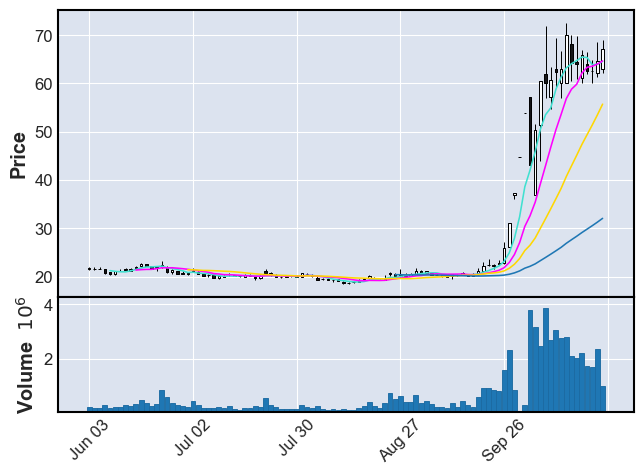

润和软件-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-20  300339  28.00  24.19  28.00  23.21    305187  7.533086e+08   
1    2012-07-27  300339  23.51  24.80  27.00  21.78    379070  9.502016e+08   
2    2012-08-03  300339  24.30  23.72  25.17  22.02    178747  4.147968e+08   
3    2012-08-10  300339  23.41  24.92  25.57  23.20    155756  3.791379e+08   
4    2012-08-17  300339  24.80  24.76  25.90  24.06     87260  2.188727e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
597  2024-09-30  300339  37.00  37.37  37.37  35.99    832555  3.087031e+09   
598  2024-10-11  300339  44.84  50.38  57.13  36.99   7308374  3.496253e+10   
599  2024-10-18  300339  51.30  62.95  71.80  44.00  14817974  9.110576e+10   
600  2024-10-25  300339  60.20  62.59  72.58  60.01  10846762  7.096691e+10   
601  2024-10-30  300339  62.66  67.07  68.98  60.00   5015601  3.239851e+10   

        振幅    涨跌幅    涨跌额     换手率  
0

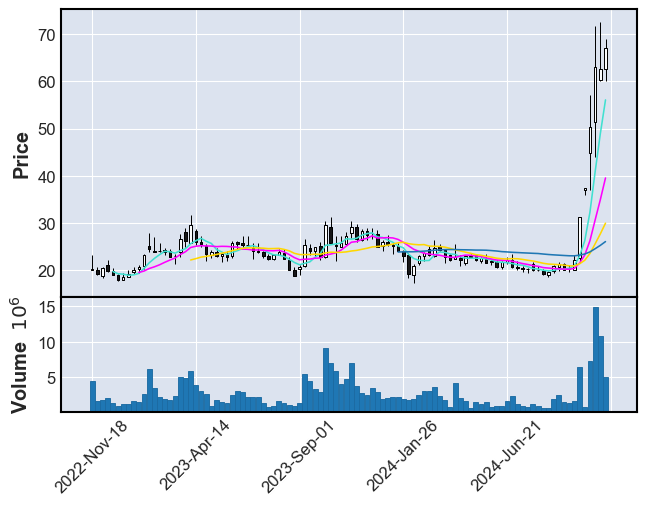

润和软件-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0    2012-07-31  300339  28.00  22.20  28.00  21.78    769468  1.904240e+09   
1    2012-08-31  300339  22.05  26.35  27.88  22.02    518439  1.285591e+09   
2    2012-09-28  300339  26.25  24.40  29.16  23.64    259629  6.996420e+08   
3    2012-10-31  300339  24.40  25.38  26.60  23.70     99730  2.513733e+08   
4    2012-11-30  300339  25.38  20.70  26.10  20.10     73468  1.762272e+08   
..          ...     ...    ...    ...    ...    ...       ...           ...   
139  2024-06-28  300339  21.68  20.67  23.34  20.26   6027210  1.307903e+10   
140  2024-07-31  300339  20.60  20.66  21.89  19.24   4915497  1.005085e+10   
141  2024-08-30  300339  20.51  21.24  21.76  18.47   6279256  1.266894e+10   
142  2024-09-30  300339  21.20  37.37  37.37  19.48  11942154  2.945327e+10   
143  2024-10-30  300339  44.84  67.00  72.58  36.99  37989013  2.294357e+11   

        振幅    涨跌幅    涨跌额     换手率  


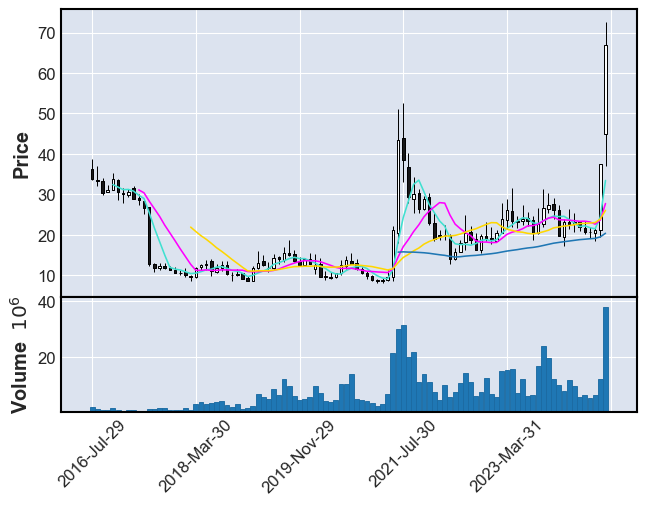

In [64]:
stocksymb='300339'
periods=['daily','weekly','monthly']
stockDict=plotDcStocks(stocksymb,periods)

### 4.1.2 盘口信息汇总
#### 4.1.2.1 成交和挂单明细
获取腾讯当日历史分笔数据

In [65]:
# 根据code代码返回“交易所+代码” 信息，或者反过来
def transferExSym(code):
    if len(code)>6:
        rescode=code[-6:]
    else:
        source={}
        source['sh']=ak.stock_sh_a_spot_em()['代码'].to_list()
        source['sz']=ak.stock_sz_a_spot_em()['代码'].to_list()
        source['bj']=ak.stock_bj_a_spot_em()['代码'].to_list()
        for k in source.keys():
            if code in source[k]:
                rescode=k+code
                break
    return rescode

In [66]:
import numpy as np
import matplotlib.pyplot as plt

#区分北交所和沪深股市，刻画市场深度。按照涨跌停板，作为极值，按照价格涨幅的measure度量区间
def priceMarketDepth(df,measure=0.01):

    open_price = df.loc[df['成交时间'] == '09:30:00', '成交价格'].iloc[0]

    # 设置涨跌停板系数
    if stocksymb == 'bj':
        limit_factor = 0.2
    else:
        limit_factor = 0.1

    # 计算最高价和最低价
    high_price = open_price * (1 + limit_factor)
    low_price = open_price * (1 - limit_factor)

    # 定义价格区间，每1%一档
    price_bins = np.round(np.arange(low_price, high_price, (high_price - low_price) * measure),2)

    # 将价格按照区间划分
    df['价格区间'] = pd.cut(df['成交价格'], bins=price_bins, right=False)

    # 按照价格区间汇总成交量
    volume_summary = df.groupby('价格区间',observed=False)['成交量'].sum().reset_index()

    # 新建 df['prop'] 列
    df['prop'] = df['性质'].apply(lambda x: -1 if x == '卖盘' else (1 if x == '买盘' else 0))
    
    # 按照价格区间汇总成交量和 prop 之和
    summary = df.groupby('价格区间',observed=False).agg({
        '成交量': 'sum',
        'prop': 'sum'
    }).reset_index()
    
    # 提取价格区间的中点和边界
    summary['价格'] = summary['价格区间'].apply(lambda x: round(x.mid,2))
    summary['起始价格'] = summary['价格区间'].apply(lambda x: round(x.left,2))
    summary['终止价格'] = summary['价格区间'].apply(lambda x: round(x.right,2))

    # 分离买盘和卖盘数据
    summary['买盘深度'] = summary['prop'].apply(lambda x: x if x > 0 else 0)
    summary['卖盘深度'] = -summary['prop'].apply(lambda x: -x if x < 0 else 0)

    # 绘制市场深度水平条形图
    fig, ax = plt.subplots(figsize=(14, 21))

    # 绘制买卖盘深度图
    ax.barh(summary['价格'], summary['买盘深度'], color='green', label='buy')
    ax.barh(summary['价格'], summary['卖盘深度'], color='red', label='sell')
    
    # 在图上标注区间价格的起始和终止价格
    for index, row in summary.iterrows():
        ax.text(row['买盘深度'] + max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["起始价格"]:.2f}', va='center', ha='left', fontsize=8, color='black')
        ax.text(-row['卖盘深度'] - max(summary['买盘深度'].max(), summary['卖盘深度'].max())*measure, row['价格'], f'{row["终止价格"]:.2f}', va='center', ha='right', fontsize=8, color='black')

    # 设置图表标题和标签
    ax.set_title('Market Depth')
    ax.set_xlabel('Depth(Amount)')
    ax.set_ylabel('Price')
    ax.legend()

    
    # 显示图表
    plt.show()
    
    return summary

In [67]:
from rich.console import Console
from rich.table import Table

#美观显示DataFrame表格
class DataFramePretty(object):
    def __init__(self, df: pd.DataFrame, min_max_cols=[]) -> None:
        self.data = df
        self.min_max_cols = min_max_cols

    def __set_min_max_style(self, df: pd.DataFrame):
        imax = self.data.idxmax()
        imin = self.data.idxmin()

        max_tmpl = "[b on red3]{}[/b on red3]"
        min_tmpl = "[i on green3]{}[/i on green3]"

        for col in self.min_max_cols:
            col_idx = imax.index.tolist().index(col)
            val = df.iloc[imax[col], col_idx]
            df.iloc[imax[col], col_idx] = max_tmpl.format(val)

            col_idx = imin.index.tolist().index(col)
            val = df.iloc[imin[col], col_idx]
            df.iloc[imin[col], col_idx] = min_tmpl.format(val)

    def show(self):
        table = Table(
            title="DataFrame",
            title_style="i on dark_cyan",
            header_style="bold cyan",
        )

        # self.data是原始数据
        # df 是用来显示的数据
        df = self.data.copy()
        for col in df.columns:
            df[col] = df[col].astype("str")
            table.add_column(col)

        self.__set_min_max_style(df)

        for idx in range(len(df)):
            table.add_row(*df.iloc[idx].tolist())

        console = Console()
        console.print(table)

In [68]:
#剔除中性单以后，列出活跃买卖市场深度
def plotActiveMarketDepth(stocksymbol):
    
    print(f'市场深度：{stocksymb}')
    #一次性获得历史分笔数据（当天即当天之前的交易时间；隔天即昨天）
    yesterdayTicks=ak.stock_zh_a_tick_tx_js(symbol=transferExSym(stocksymb))
    
    md=priceMarketDepth(yesterdayTicks)
    md = md[(md['买盘深度'] != 0) | (md['卖盘深度'] != 0)]
    mdp=DataFramePretty(md)
    mdp.show()
    return  md

剔除中性盘以后，主动买卖盘的市场深度

市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


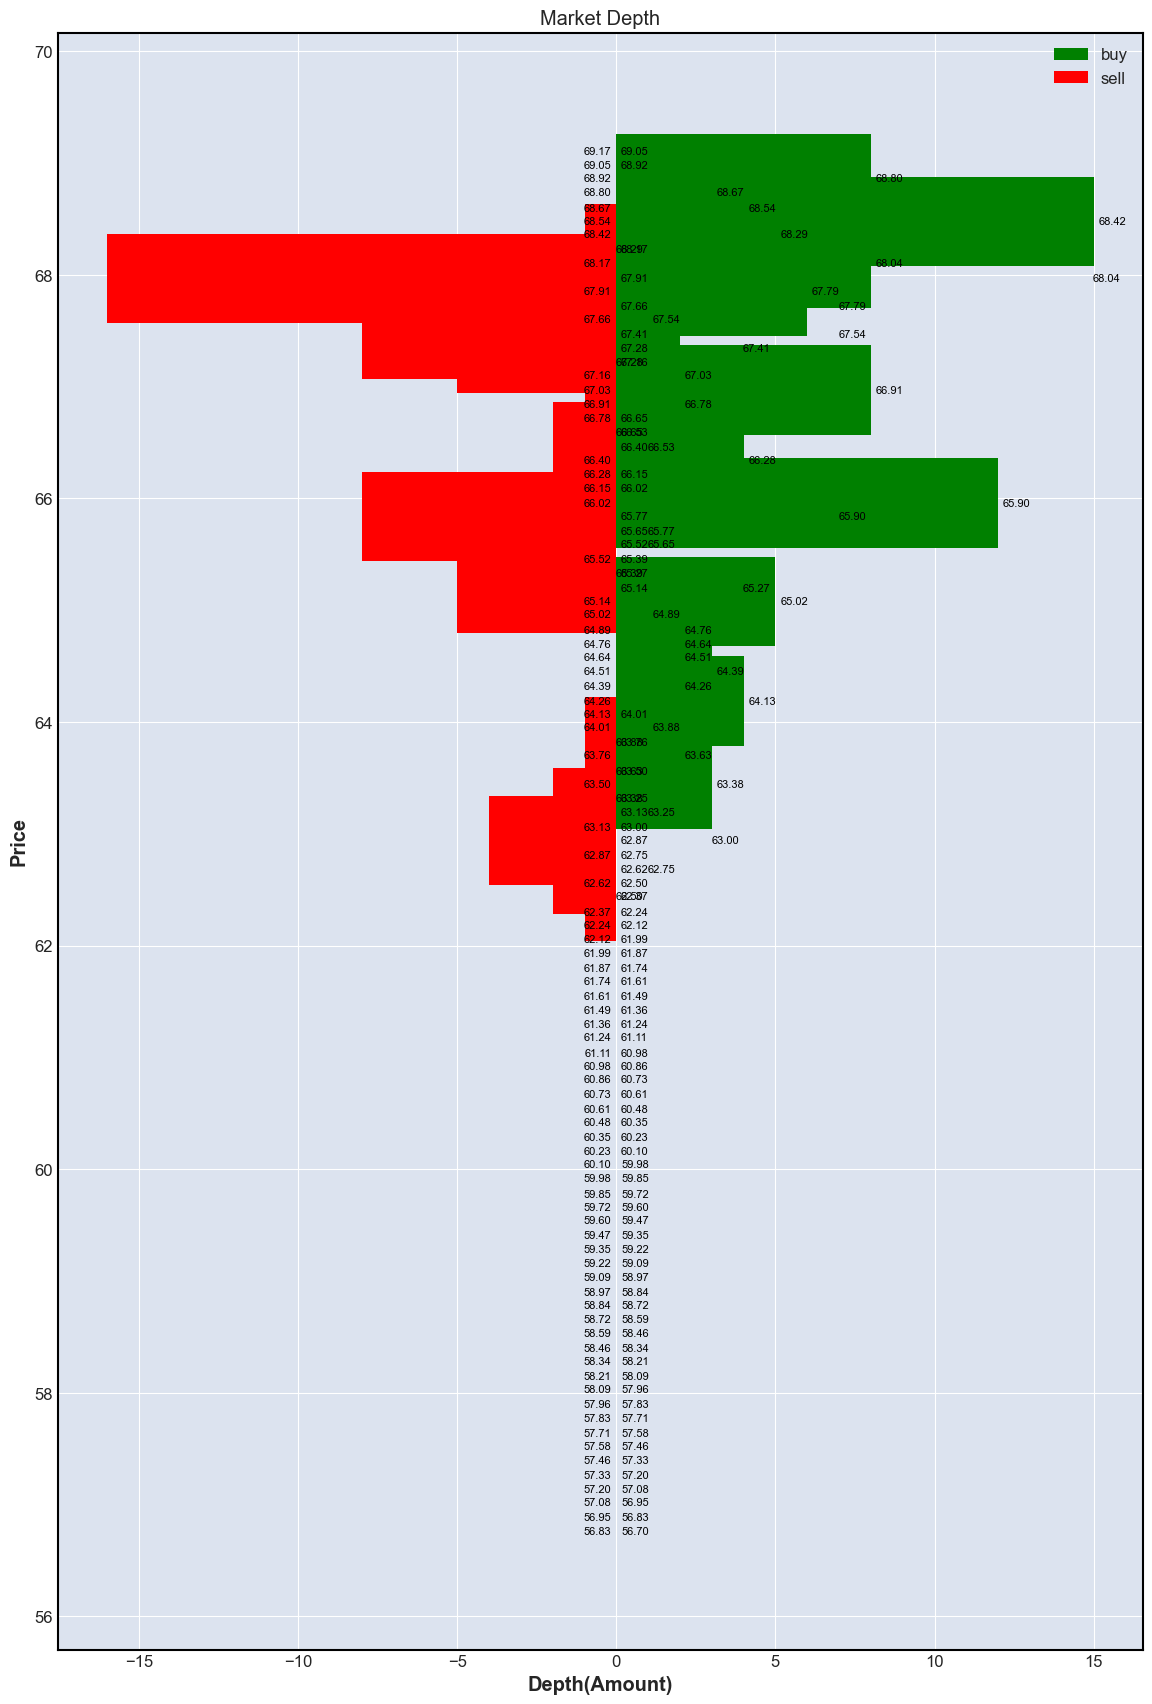

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.37, 62.5)  │ 1753   │ -1   │ 62.44 │ 62.37    │ 62.5     │ 0        │ -1       │
│ [62.62, 62.75) │ 2392   │ -2   │ 62.68 │ 62.62    │ 62.75    │ 0        │ -2       │
│ [62.87, 63.0)  │ 7874   │ -4   │ 62.94 │ 62.87    │ 63.0     │ 0        │ -4       │
│ [63.13, 63.25) │ 2364   │ -2   │ 63.19 │ 63.13    │ 63.25    │ 0        │ -2       │
│ [63.25, 63.38) │ 8587   │ -1   │ 63.32 │ 63.25    │ 63.38    │ 0        │ -1       │
│ [63.38, 63.5)  │ 8753   │ 3    │ 63.44 │ 63.38    │ 63.5     │ 3        │ 0        │
│ [63.5, 63.63)  │ 13748  │ -1   │ 63.56 │ 63.5     │ 63.63    │ 0        │ -1       │
│ [63.63, 63.76) │ 8807   │ 2    │ 63.7  │ 63.63    │ 63.76    │ 2        │ 0        │
│ [63.76, 63.88) │ 6112   │ -1   │ 63.82 │ 63.76    │ 63.88    │ 0        │ -1       │
│ [63.88, 64.01) │ 24914  │ 1    │ 63.95 │ 63.88    │ 64.01    │ 1        │ 0        │
│ [64.13, 64.26) │ 4869   │ 4    │ 64.19 │ 64.13    │ 64.26    │ 4        │ 0        │
│ [64.26, 64.39) │ 3355   │ 2    │ 64.32 │ 64.26    │ 64.39    │ 2        │ 0        │
│ [64.39, 64.51) │ 7002   │ 3    │ 64.45 │ 64.39    │ 64.51    │ 3        │ 0        │
│ [64.51, 64.64) │ 3739   │ 2    │ 64.58 │ 64.51    │ 64.64    │ 2        │ 0        │
│ [64.64, 64.76) │ 1010   │ 2    │ 64.7  │ 64.64    │ 64.76    │ 2        │ 0        │
│ [64.76, 64.89) │ 1481   │ 2    │ 64.82 │ 64.76    │ 64.89    │ 2        │ 0        │
│ [64.89, 65.02) │ 14431  │ 1    │ 64.96 │ 64.89    │ 65.02    │ 1        │ 0        │
│ [65.02, 65.14) │ 13382  │ 5    │ 65.08 │ 65.02    │ 65.14    │ 5        │ 0        │
│ [65.14, 65.27) │ 18894  │ -5   │ 65.2  │ 65.14    │ 65.27    │ 0        │ -5       │
│ [65.27, 65.39) │ 10352  │ -1   │ 65.33 │ 65.27    │ 65.39    │ 0        │ -1       │
│ [65.52, 65.65) │ 27137  │ -2   │ 65.59 │ 65.52    │ 65.65    │ 0        │ -2       │
│ [65.65, 65.77) │ 18317  │ -2   │ 65.71 │ 65.65    │ 65.77    │ 0        │ -2       │
│ [65.77, 65.9)  │ 29602  │ -8   │ 65.84 │ 65.77    │ 65.9     │ 0        │ -8       │
│ [65.9, 66.02)  │ 36208  │ 12   │ 65.96 │ 65.9     │ 66.02    │ 12       │ 0        │
│ [66.28, 66.4)  │ 19468  │ 4    │ 66.34 │ 66.28    │ 66.4     │ 4        │ 0        │
│ [66.4, 66.53)  │ 19864  │ -2   │ 66.46 │ 66.4     │ 66.53    │ 0        │ -2       │
│ [66.53, 66.65) │ 24577  │ -1   │ 66.59 │ 66.53    │ 66.65    │ 0        │ -1       │
│ [66.78, 66.91) │ 35071  │ 2    │ 66.84 │ 66.78    │ 66.91    │ 2        │ 0        │
│ [66.91, 67.03) │ 45328  │ 8    │ 66.97 │ 66.91    │ 67.03    │ 8        │ 0        │
│ [67.03, 67.16) │ 21961  │ 2    │ 67.1  │ 67.03    │ 67.16    │ 2        │ 0        │
│ [67.16, 67.28) │ 13304  │ -1   │ 67.22 │ 67.16    │ 67.28    │ 0        │ -1       │
│ [67.28, 67.41) │ 23803  │ -5   │ 67.34 │ 67.28    │ 67.41    │ 0        │ -5       │
│ [67.41, 67.54) │ 25194  │ -8   │ 67.47 │ 67.41    │ 67.54    │ 0        │ -8       │
│ [67.54, 67.66) │ 22480  │ 1    │ 67.6  │ 67.54    │ 67.66    │ 1        │ 0        │
│ [67.66, 67.79) │ 12967  │ -8   │ 67.72 │ 67.66    │ 67.79    │ 0        │ -8       │
│ [67.79, 67.91) │ 21877  │ 6    │ 67.85 │ 67.79    │ 67.91    │ 6        │ 0        │
│ [67.91, 68.04) │ 81984  │ -16  │ 67.97 │ 67.91    │ 68.04    │ 0        │ -16      │
│ [68.04, 68.17) │ 31914  │ 8    │ 68.1  │ 68.04    │ 68.17    │ 8        │ 0        │
│ [68.17, 68.29) │ 24247  │ -1   │ 68.23 │ 68.17    │ 68.29    │ 0        │ -1       │
│ [68.29, 68.42) │ 28033  │ 5    │ 68.36 │ 68.29    │ 68.42    │ 5        │ 0        │
│ [68.42, 68.54) │ 33652  │ 15   │ 68.48 │ 68.42    │ 68.54    │ 15       │ 0        │
│ [68.54, 68.67) │ 20629  │ 4    │ 68.6  │ 68.54    │ 68.67    │ 4        │ 0        │
│ [68.67, 68.8)  │ 3098

,价格区间,成交量,prop,价格,起始价格,终止价格,买盘深度,卖盘深度
45,"[62.37, 62.5)",1753,-1,62.44,62.37,62.50,0,-1
47,"[62.62, 62.75)",2392,-2,62.68,62.62,62.75,0,-2
49,"[62.87, 63.0)",7874,-4,62.94,62.87,63.00,0,-4
51,"[63.13, 63.25)",2364,-2,63.19,63.13,63.25,0,-2
52,"[63.25, 63.38)",8587,-1,63.32,63.25,63.38,0,-1
53,"[63.38, 63.5)",8753,3,63.44,63.38,63.50,3,0
54,"[63.5, 63.63)",13748,-1,63.56,63.50,63.63,0,-1
55,"[63.63, 63.76)",8807,2,63.70,63.63,63.76,2,0
56,"[63.76, 63.88)",6112,-1,63.82,63.76,63.88,0,-1
57,"[63.88, 64.01)",24914,1,63.95,63.88,64.01,1,0


In [69]:
plotActiveMarketDepth(stocksymb)

### 4.1.3 个股追踪

容大感光-周期：daily
              日期    股票代码     开盘     收盘     最高     最低     成交量           成交额  \
0     2016-12-20  300576   9.89  11.87  11.87   9.89      84  9.803500e+04   
1     2016-12-21  300576  13.06  13.06  13.06  13.06      20  2.612000e+04   
2     2016-12-22  300576  14.37  14.37  14.37  14.37      11  1.580700e+04   
3     2016-12-23  300576  15.81  15.81  15.81  15.81      35  5.533500e+04   
4     2016-12-26  300576  17.39  17.39  17.39  17.39      39  6.782100e+04   
...          ...     ...    ...    ...    ...    ...     ...           ...   
1893  2024-10-24  300576  49.15  49.17  50.07  48.60  159866  7.864428e+08   
1894  2024-10-25  300576  49.84  48.73  50.05  48.61  200573  9.861098e+08   
1895  2024-10-28  300576  48.75  49.49  49.66  47.76  161420  7.884177e+08   
1896  2024-10-29  300576  49.49  50.20  51.64  48.82  272730  1.366668e+09   
1897  2024-10-30  300576  49.20  49.49  50.50  49.02   68816  3.420308e+08   

         振幅    涨跌幅   涨跌额    换手率  
0     24.03  44

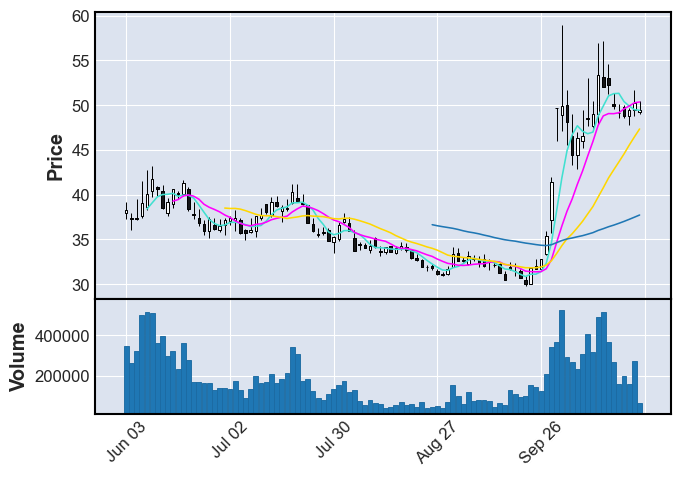

容大感光-周期：weekly
             日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0    2016-12-23  300576   9.89  15.81  15.81   9.89      150  1.952970e+05   
1    2016-12-30  300576  17.39  25.45  25.45  17.39      239  5.274280e+05   
2    2017-01-06  300576  28.00  37.27  37.27  28.00     1382  4.588265e+06   
3    2017-01-13  300576  41.00  44.99  49.00  41.00   274981  1.270494e+09   
4    2017-01-20  300576  44.10  41.00  44.30  38.47   266327  1.094907e+09   
..          ...     ...    ...    ...    ...    ...      ...           ...   
395  2024-09-30  300576  37.20  41.38  41.97  35.70   340237  1.323581e+09   
396  2024-10-11  300576  49.66  44.38  58.98  43.30  1453032  7.144060e+09   
397  2024-10-18  300576  44.39  53.35  56.98  42.87  1756876  8.646117e+09   
398  2024-10-25  300576  53.19  48.73  57.16  48.60  1506916  7.825647e+09   
399  2024-10-30  300576  48.75  49.48  51.64  47.76   503037  2.497468e+09   

        振幅    涨跌幅    涨跌额     换手率  
0    71.84  9

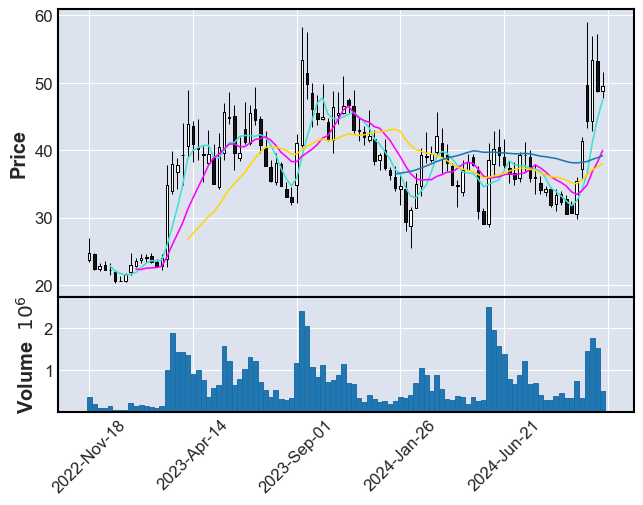

容大感光-周期：monthly
            日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0   2016-12-30  300576   9.89  25.45  25.45   9.89      389  7.227250e+05   
1   2017-01-26  300576  28.00  41.80  49.00  28.00   645691  2.793503e+09   
2   2017-02-28  300576  42.00  46.25  46.48  40.60   577638  2.535418e+09   
3   2017-03-31  300576  46.23  44.79  52.50  44.40   625741  3.038817e+09   
4   2017-04-28  300576  43.99  40.30  46.98  36.08   185168  7.561082e+08   
..         ...     ...    ...    ...    ...    ...      ...           ...   
90  2024-06-28  300576  38.00  36.53  43.20  35.10  5648194  2.216295e+10   
91  2024-07-31  300576  36.57  36.60  41.20  33.53  3828562  1.447531e+10   
92  2024-08-30  300576  36.96  33.38  38.00  30.90  1650007  5.620156e+09   
93  2024-09-30  300576  33.45  41.38  41.97  29.78  2197749  7.319578e+09   
94  2024-10-30  300576  49.66  49.47  58.98  42.87  5219899  2.611348e+10   

        振幅     涨跌幅    涨跌额     换手率  
0   188.83  208.86  17.

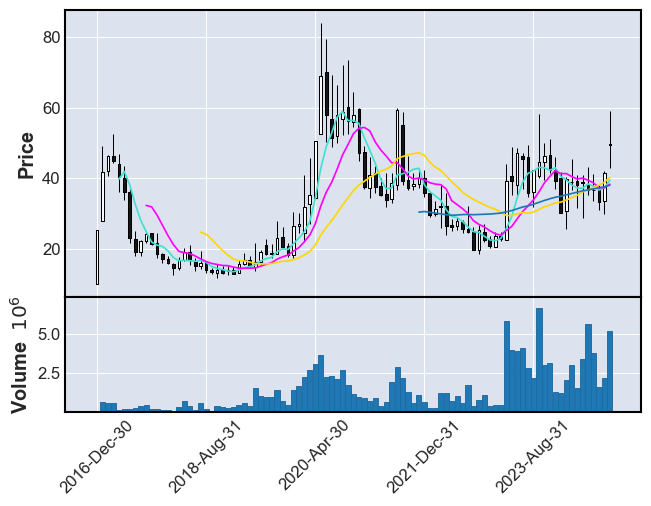

容大感光（300576）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


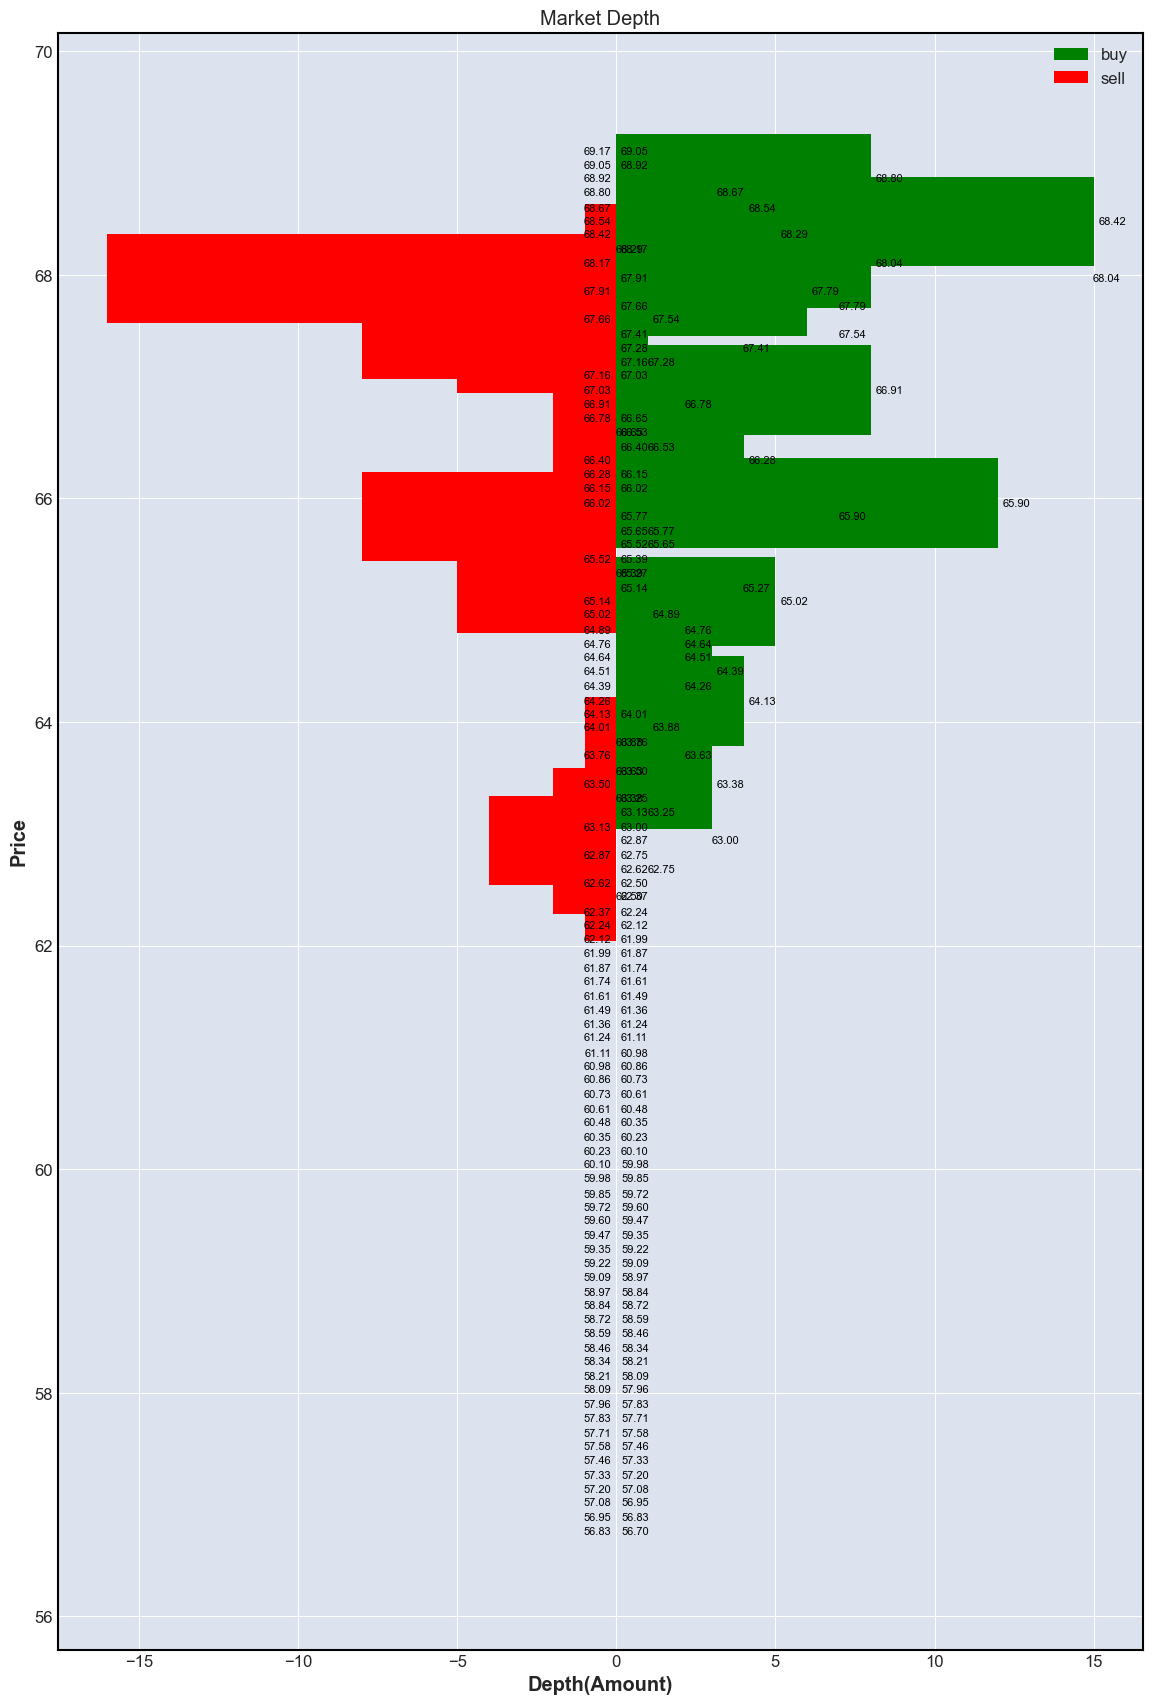

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.37, 62.5)  │ 1753   │ -1   │ 62.44 │ 62.37    │ 62.5     │ 0        │ -1       │
│ [62.62, 62.75) │ 2392   │ -2   │ 62.68 │ 62.62    │ 62.75    │ 0        │ -2       │
│ [62.87, 63.0)  │ 7874   │ -4   │ 62.94 │ 62.87    │ 63.0     │ 0        │ -4       │
│ [63.13, 63.25) │ 2364   │ -2   │ 63.19 │ 63.13    │ 63.25    │ 0        │ -2       │
│ [63.25, 63.38) │ 8587   │ -1   │ 63.32 │ 63.25    │ 63.38    │ 0        │ -1       │
│ [63.38, 63.5)  │ 8753   │ 3    │ 63.44 │ 63.38    │ 63.5     │ 3        │ 0        │
│ [63.5, 63.63)  │ 13748  │ -1   │ 63.56 │ 63.5     │ 63.63    │ 0        │ -1       │
│ [63.63, 63.76) │ 8807   │ 2    │ 63.7  │ 63.63    │ 63.76    │ 2        │ 0        │
│ [63.76, 63.88) │ 6112   │ -1   │ 63.82 │ 63.76    │ 63.88    │ 0        │ -1       │
│ [63.88, 64.01) │ 24914  │ 1    │ 63.95 │ 63.88    │ 64.01    │ 1        │ 0        │
│ [64.13, 64.26) │ 4869   │ 4    │ 64.19 │ 64.13    │ 64.26    │ 4        │ 0        │
│ [64.26, 64.39) │ 3355   │ 2    │ 64.32 │ 64.26    │ 64.39    │ 2        │ 0        │
│ [64.39, 64.51) │ 7002   │ 3    │ 64.45 │ 64.39    │ 64.51    │ 3        │ 0        │
│ [64.51, 64.64) │ 3739   │ 2    │ 64.58 │ 64.51    │ 64.64    │ 2        │ 0        │
│ [64.64, 64.76) │ 1010   │ 2    │ 64.7  │ 64.64    │ 64.76    │ 2        │ 0        │
│ [64.76, 64.89) │ 1481   │ 2    │ 64.82 │ 64.76    │ 64.89    │ 2        │ 0        │
│ [64.89, 65.02) │ 14431  │ 1    │ 64.96 │ 64.89    │ 65.02    │ 1        │ 0        │
│ [65.02, 65.14) │ 13382  │ 5    │ 65.08 │ 65.02    │ 65.14    │ 5        │ 0        │
│ [65.14, 65.27) │ 18894  │ -5   │ 65.2  │ 65.14    │ 65.27    │ 0        │ -5       │
│ [65.27, 65.39) │ 10352  │ -1   │ 65.33 │ 65.27    │ 65.39    │ 0        │ -1       │
│ [65.52, 65.65) │ 27137  │ -2   │ 65.59 │ 65.52    │ 65.65    │ 0        │ -2       │
│ [65.65, 65.77) │ 18317  │ -2   │ 65.71 │ 65.65    │ 65.77    │ 0        │ -2       │
│ [65.77, 65.9)  │ 29602  │ -8   │ 65.84 │ 65.77    │ 65.9     │ 0        │ -8       │
│ [65.9, 66.02)  │ 36208  │ 12   │ 65.96 │ 65.9     │ 66.02    │ 12       │ 0        │
│ [66.28, 66.4)  │ 19468  │ 4    │ 66.34 │ 66.28    │ 66.4     │ 4        │ 0        │
│ [66.4, 66.53)  │ 19864  │ -2   │ 66.46 │ 66.4     │ 66.53    │ 0        │ -2       │
│ [66.53, 66.65) │ 24577  │ -1   │ 66.59 │ 66.53    │ 66.65    │ 0        │ -1       │
│ [66.78, 66.91) │ 35071  │ 2    │ 66.84 │ 66.78    │ 66.91    │ 2        │ 0        │
│ [66.91, 67.03) │ 45328  │ 8    │ 66.97 │ 66.91    │ 67.03    │ 8        │ 0        │
│ [67.16, 67.28) │ 15993  │ -2   │ 67.22 │ 67.16    │ 67.28    │ 0        │ -2       │
│ [67.28, 67.41) │ 23803  │ -5   │ 67.34 │ 67.28    │ 67.41    │ 0        │ -5       │
│ [67.41, 67.54) │ 25194  │ -8   │ 67.47 │ 67.41    │ 67.54    │ 0        │ -8       │
│ [67.54, 67.66) │ 22480  │ 1    │ 67.6  │ 67.54    │ 67.66    │ 1        │ 0        │
│ [67.66, 67.79) │ 12967  │ -8   │ 67.72 │ 67.66    │ 67.79    │ 0        │ -8       │
│ [67.79, 67.91) │ 21877  │ 6    │ 67.85 │ 67.79    │ 67.91    │ 6        │ 0        │
│ [67.91, 68.04) │ 81984  │ -16  │ 67.97 │ 67.91    │ 68.04    │ 0        │ -16      │
│ [68.04, 68.17) │ 31914  │ 8    │ 68.1  │ 68.04    │ 68.17    │ 8        │ 0        │
│ [68.17, 68.29) │ 24247  │ -1   │ 68.23 │ 68.17    │ 68.29    │ 0        │ -1       │
│ [68.29, 68.42) │ 28033  │ 5    │ 68.36 │ 68.29    │ 68.42    │ 5        │ 0        │
│ [68.42, 68.54) │ 33652  │ 15   │ 68.48 │ 68.42    │ 68.54    │ 15       │ 0        │
│ [68.54, 68.67) │ 20629  │ 4    │ 68.6  │ 68.54    │ 68.67    │ 4        │ 0        │
│ [68.67, 68.8)  │ 30983  │ 3    │ 68.74 │ 68.67    │ 68.8     │ 3        │ 0        │
│ [68.8, 68.92)  │ 3284

四川长虹-周期：daily
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60    261990  4.998470e+08   
1     1994-03-14  600839  21.00  19.80  21.50  19.40    107229  2.192590e+08   
2     1994-03-15  600839  19.80  19.25  20.48  19.12     37734  7.467700e+07   
3     1994-03-16  600839  19.20  19.28  20.02  19.10     24602  4.795900e+07   
4     1994-03-17  600839  19.55  18.60  19.59  18.02     16785  3.193100e+07   
...          ...     ...    ...    ...    ...    ...       ...           ...   
7273  2024-10-24  600839  10.79  10.99  11.85   9.88  16298929  1.726567e+10   
7274  2024-10-25  600839  10.60  11.25  11.84  10.27  12938545  1.429248e+10   
7275  2024-10-28  600839  11.48  12.38  12.38  11.13   7097061  8.379779e+09   
7276  2024-10-29  600839  13.62  13.62  13.62  12.88   5206544  7.062985e+09   
7277  2024-10-30  600839  14.00  14.98  14.98  13.82   6768405  9.940157e+09   

          振幅      涨跌幅    

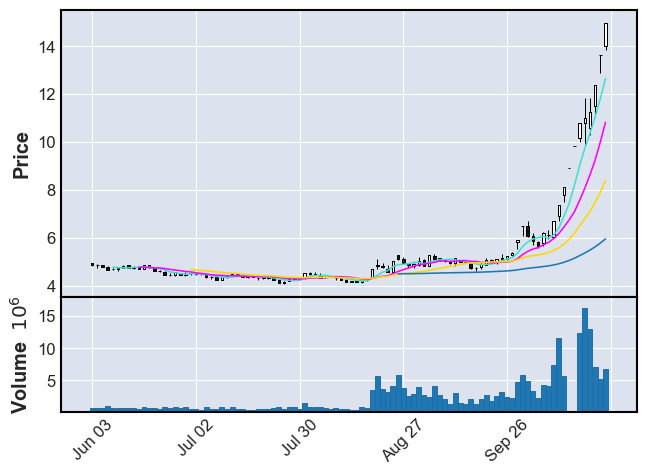

四川长虹-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1994-03-11  600839  16.80  19.69  20.50  16.60    261990  4.998470e+08   
1     1994-03-18  600839  21.00  17.70  21.50  17.40    209638  4.154680e+08   
2     1994-03-25  600839  17.40  15.39  17.41  15.20     71628  1.181880e+08   
3     1994-04-01  600839  15.00  15.48  16.80  14.62    102736  1.609320e+08   
4     1994-04-08  600839  15.50  15.65  16.59  15.40     64293  1.025340e+08   
...          ...     ...    ...    ...    ...    ...       ...           ...   
1523  2024-09-30  600839   5.81   5.91   5.91   5.52   4810405  2.775233e+09   
1524  2024-10-11  600839   6.50   5.66   6.68   5.56  16405826  1.015380e+10   
1525  2024-10-18  600839   5.77   8.11   8.11   5.67  33013404  2.269582e+10   
1526  2024-10-25  600839   8.92  11.25  11.85   8.92  42141979  4.519061e+10   
1527  2024-10-30  600839  11.48  14.98  14.98  11.13  19072069  2.538301e+10   

          振幅      涨跌幅   

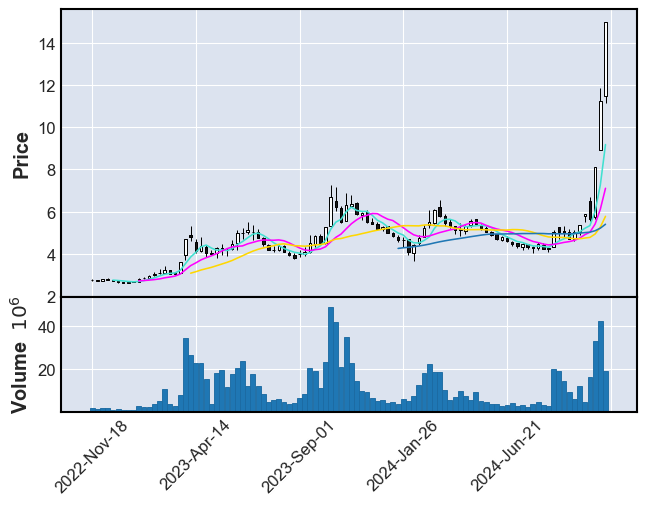

四川长虹-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    1994-03-31  600839  16.80  15.41  21.50  14.62     638439  1.182779e+09   
1    1994-04-29  600839  15.59  12.91  16.59  12.40     268187  3.796230e+08   
2    1994-05-31  600839  13.00  13.90  16.10  12.86     351145  5.016150e+08   
3    1994-06-30  600839  13.98   9.28  14.75   9.08     243446  2.901890e+08   
4    1994-07-29  600839   9.20   7.33   9.22   7.15     143116  1.147780e+08   
..          ...     ...    ...    ...    ...    ...        ...           ...   
360  2024-06-28  600839   4.93   4.49   4.95   4.38   14081842  6.585585e+09   
361  2024-07-31  600839   4.51   4.52   4.54   4.06   15152279  6.591300e+09   
362  2024-08-30  600839   4.52   5.04   5.28   4.09   47096018  2.259755e+10   
363  2024-09-30  600839   5.07   5.91   5.91   4.60   46917533  2.402882e+10   
364  2024-10-30  600839   6.50  14.98  14.98   5.56  110633342  1.034233e+11   

         振幅      涨跌幅   

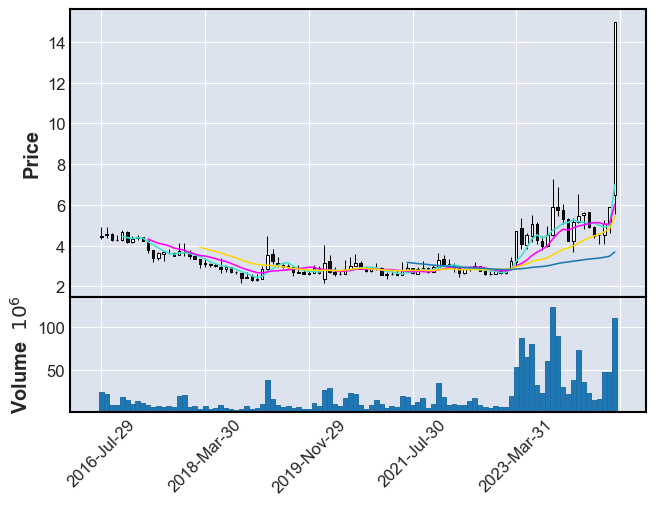

四川长虹（600839）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


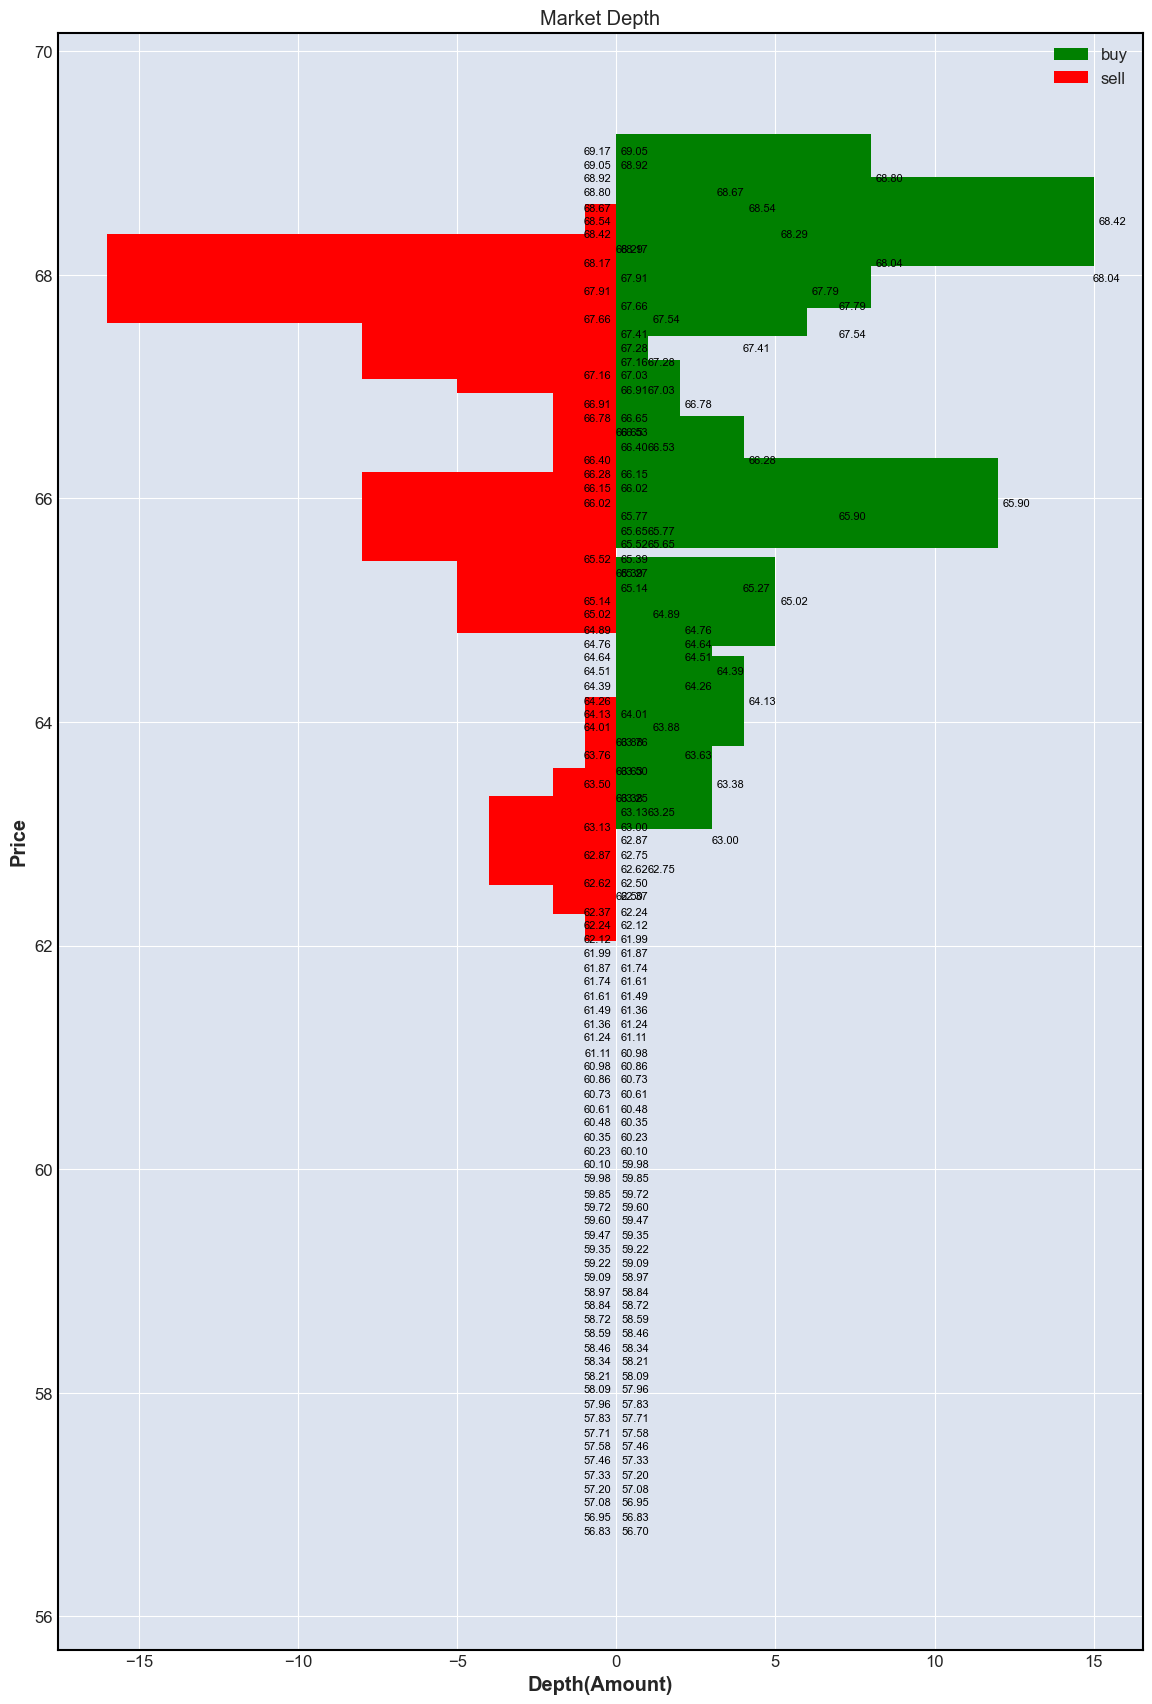

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.37, 62.5)  │ 1753   │ -1   │ 62.44 │ 62.37    │ 62.5     │ 0        │ -1       │
│ [62.62, 62.75) │ 2392   │ -2   │ 62.68 │ 62.62    │ 62.75    │ 0        │ -2       │
│ [62.87, 63.0)  │ 7874   │ -4   │ 62.94 │ 62.87    │ 63.0     │ 0        │ -4       │
│ [63.13, 63.25) │ 2364   │ -2   │ 63.19 │ 63.13    │ 63.25    │ 0        │ -2       │
│ [63.25, 63.38) │ 8587   │ -1   │ 63.32 │ 63.25    │ 63.38    │ 0        │ -1       │
│ [63.38, 63.5)  │ 8753   │ 3    │ 63.44 │ 63.38    │ 63.5     │ 3        │ 0        │
│ [63.5, 63.63)  │ 13748  │ -1   │ 63.56 │ 63.5     │ 63.63    │ 0        │ -1       │
│ [63.63, 63.76) │ 8807   │ 2    │ 63.7  │ 63.63    │ 63.76    │ 2        │ 0        │
│ [63.76, 63.88) │ 6112   │ -1   │ 63.82 │ 63.76    │ 63.88    │ 0        │ -1       │
│ [63.88, 64.01) │ 24914  │ 1    │ 63.95 │ 63.88    │ 64.01    │ 1        │ 0        │
│ [64.13, 64.26) │ 4869   │ 4    │ 64.19 │ 64.13    │ 64.26    │ 4        │ 0        │
│ [64.26, 64.39) │ 3355   │ 2    │ 64.32 │ 64.26    │ 64.39    │ 2        │ 0        │
│ [64.39, 64.51) │ 7002   │ 3    │ 64.45 │ 64.39    │ 64.51    │ 3        │ 0        │
│ [64.51, 64.64) │ 3739   │ 2    │ 64.58 │ 64.51    │ 64.64    │ 2        │ 0        │
│ [64.64, 64.76) │ 1010   │ 2    │ 64.7  │ 64.64    │ 64.76    │ 2        │ 0        │
│ [64.76, 64.89) │ 1481   │ 2    │ 64.82 │ 64.76    │ 64.89    │ 2        │ 0        │
│ [64.89, 65.02) │ 14431  │ 1    │ 64.96 │ 64.89    │ 65.02    │ 1        │ 0        │
│ [65.02, 65.14) │ 13382  │ 5    │ 65.08 │ 65.02    │ 65.14    │ 5        │ 0        │
│ [65.14, 65.27) │ 18894  │ -5   │ 65.2  │ 65.14    │ 65.27    │ 0        │ -5       │
│ [65.27, 65.39) │ 10352  │ -1   │ 65.33 │ 65.27    │ 65.39    │ 0        │ -1       │
│ [65.52, 65.65) │ 27137  │ -2   │ 65.59 │ 65.52    │ 65.65    │ 0        │ -2       │
│ [65.65, 65.77) │ 18317  │ -2   │ 65.71 │ 65.65    │ 65.77    │ 0        │ -2       │
│ [65.77, 65.9)  │ 29602  │ -8   │ 65.84 │ 65.77    │ 65.9     │ 0        │ -8       │
│ [65.9, 66.02)  │ 36208  │ 12   │ 65.96 │ 65.9     │ 66.02    │ 12       │ 0        │
│ [66.28, 66.4)  │ 19468  │ 4    │ 66.34 │ 66.28    │ 66.4     │ 4        │ 0        │
│ [66.4, 66.53)  │ 19864  │ -2   │ 66.46 │ 66.4     │ 66.53    │ 0        │ -2       │
│ [66.53, 66.65) │ 24577  │ -1   │ 66.59 │ 66.53    │ 66.65    │ 0        │ -1       │
│ [66.78, 66.91) │ 35071  │ 2    │ 66.84 │ 66.78    │ 66.91    │ 2        │ 0        │
│ [66.91, 67.03) │ 51017  │ -2   │ 66.97 │ 66.91    │ 67.03    │ 0        │ -2       │
│ [67.16, 67.28) │ 15993  │ -2   │ 67.22 │ 67.16    │ 67.28    │ 0        │ -2       │
│ [67.28, 67.41) │ 23803  │ -5   │ 67.34 │ 67.28    │ 67.41    │ 0        │ -5       │
│ [67.41, 67.54) │ 25194  │ -8   │ 67.47 │ 67.41    │ 67.54    │ 0        │ -8       │
│ [67.54, 67.66) │ 22480  │ 1    │ 67.6  │ 67.54    │ 67.66    │ 1        │ 0        │
│ [67.66, 67.79) │ 12967  │ -8   │ 67.72 │ 67.66    │ 67.79    │ 0        │ -8       │
│ [67.79, 67.91) │ 21877  │ 6    │ 67.85 │ 67.79    │ 67.91    │ 6        │ 0        │
│ [67.91, 68.04) │ 81984  │ -16  │ 67.97 │ 67.91    │ 68.04    │ 0        │ -16      │
│ [68.04, 68.17) │ 31914  │ 8    │ 68.1  │ 68.04    │ 68.17    │ 8        │ 0        │
│ [68.17, 68.29) │ 24247  │ -1   │ 68.23 │ 68.17    │ 68.29    │ 0        │ -1       │
│ [68.29, 68.42) │ 28033  │ 5    │ 68.36 │ 68.29    │ 68.42    │ 5        │ 0        │
│ [68.42, 68.54) │ 33652  │ 15   │ 68.48 │ 68.42    │ 68.54    │ 15       │ 0        │
│ [68.54, 68.67) │ 20629  │ 4    │ 68.6  │ 68.54    │ 68.67    │ 4        │ 0        │
│ [68.67, 68.8)  │ 30983  │ 3    │ 68.74 │ 68.67    │ 68.8     │ 3        │ 0        │
│ [68.8, 68.92)  │ 3284

永泰能源-周期：daily
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1998-05-13  600157  26.00  27.75  29.48  26.00     50950  1.408840e+08   
1     1998-05-14  600157  27.78  25.45  28.10  25.30     20929  5.531800e+07   
2     1998-05-15  600157  25.02  24.60  25.58  24.31     15781  3.924200e+07   
3     1998-05-18  600157  24.50  23.81  24.50  23.76     11755  2.827300e+07   
4     1998-05-19  600157  23.80  23.50  23.80  22.08     16182  3.712100e+07   
...          ...     ...    ...    ...    ...    ...       ...           ...   
5850  2024-10-24  600157   1.28   1.30   1.32   1.27   7247041  9.390593e+08   
5851  2024-10-25  600157   1.30   1.30   1.31   1.28   5610531  7.281015e+08   
5852  2024-10-28  600157   1.30   1.41   1.42   1.29  15344235  2.084905e+09   
5853  2024-10-29  600157   1.38   1.35   1.39   1.34  10500589  1.429715e+09   
5854  2024-10-30  600157   1.33   1.37   1.39   1.32   4420042  6.011174e+08   

          振幅      涨跌幅    

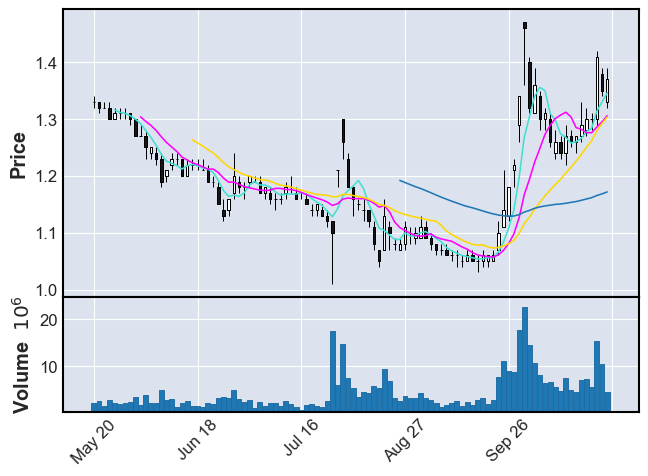

永泰能源-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低       成交量           成交额  \
0     1998-05-15  600157  26.00  24.60  29.48  24.31     87660  2.354440e+08   
1     1998-05-22  600157  24.50  24.95  25.18  22.08     51987  1.233330e+08   
2     1998-05-29  600157  25.48  23.75  27.28  23.20     26008  6.372000e+07   
3     1998-06-05  600157  24.20  24.75  25.17  23.36     13361  3.240100e+07   
4     1998-06-12  600157  24.90  25.89  25.98  24.05     26943  6.759000e+07   
...          ...     ...    ...    ...    ...    ...       ...           ...   
1242  2024-09-30  600157   1.29   1.34   1.34   1.26  17706093  2.327314e+09   
1243  2024-10-11  600157   1.47   1.30   1.47   1.28  55754756  7.725249e+09   
1244  2024-10-18  600157   1.30   1.27   1.32   1.22  30380161  3.858307e+09   
1245  2024-10-25  600157   1.27   1.30   1.33   1.24  29238345  3.753785e+09   
1246  2024-10-30  600157   1.30   1.37   1.42   1.29  30265856  4.115872e+09   

          振幅      涨跌幅   

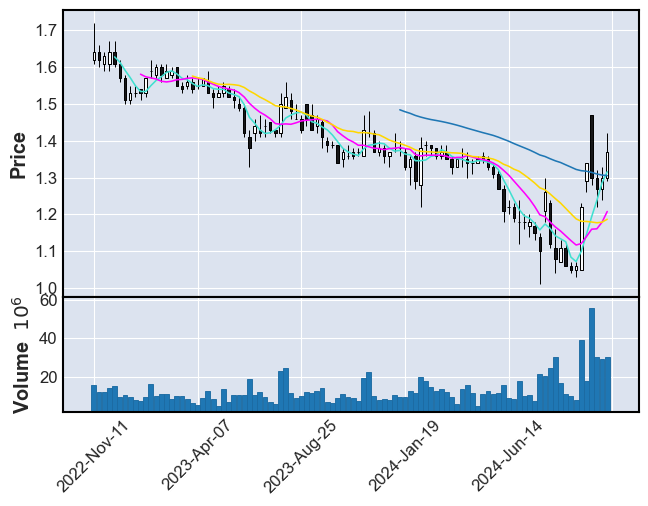

永泰能源-周期：monthly
             日期    股票代码     开盘     收盘     最高     最低        成交量           成交额  \
0    1998-05-29  600157  26.00  23.75  29.48  22.08     165655  4.224970e+08   
1    1998-06-30  600157  24.20  27.03  27.55  23.36     108225  2.785490e+08   
2    1998-07-31  600157  27.10  14.80  28.00  14.60     103495  2.595380e+08   
3    1998-08-31  600157  14.75  17.39  17.48  13.00     313861  5.006800e+08   
4    1998-09-30  600157  17.38  22.09  22.23  16.90     581358  1.173200e+09   
..          ...     ...    ...    ...    ...    ...        ...           ...   
297  2024-06-28  600157   1.27   1.18   1.28   1.12   50584925  6.082778e+09   
298  2024-07-24  600157   1.18   1.10   1.20   1.01   48819005  5.461865e+09   
299  2024-08-30  600157   1.21   1.11   1.30   1.04   92433026  1.058989e+10   
300  2024-09-30  600157   1.11   1.34   1.34   1.03   85680836  9.881254e+09   
301  2024-10-30  600157   1.47   1.36   1.47   1.22  145640678  1.945343e+10   

         振幅      涨跌幅   

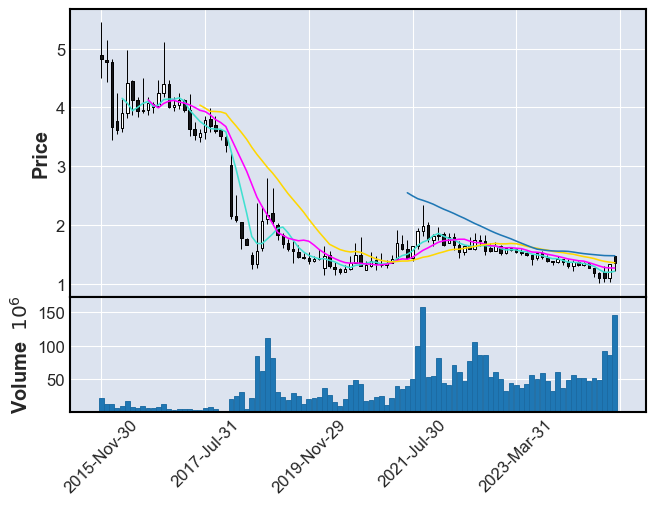

永泰能源（600157）的市场深度：
市场深度：300339


/Users/mac/anaconda3/lib/python3.11/site-packages/akshare/stock/stock_zh_a_tick_tx.py:26: UserWarning: 正在下载数据，请稍等
  warnings.warn("正在下载数据，请稍等")


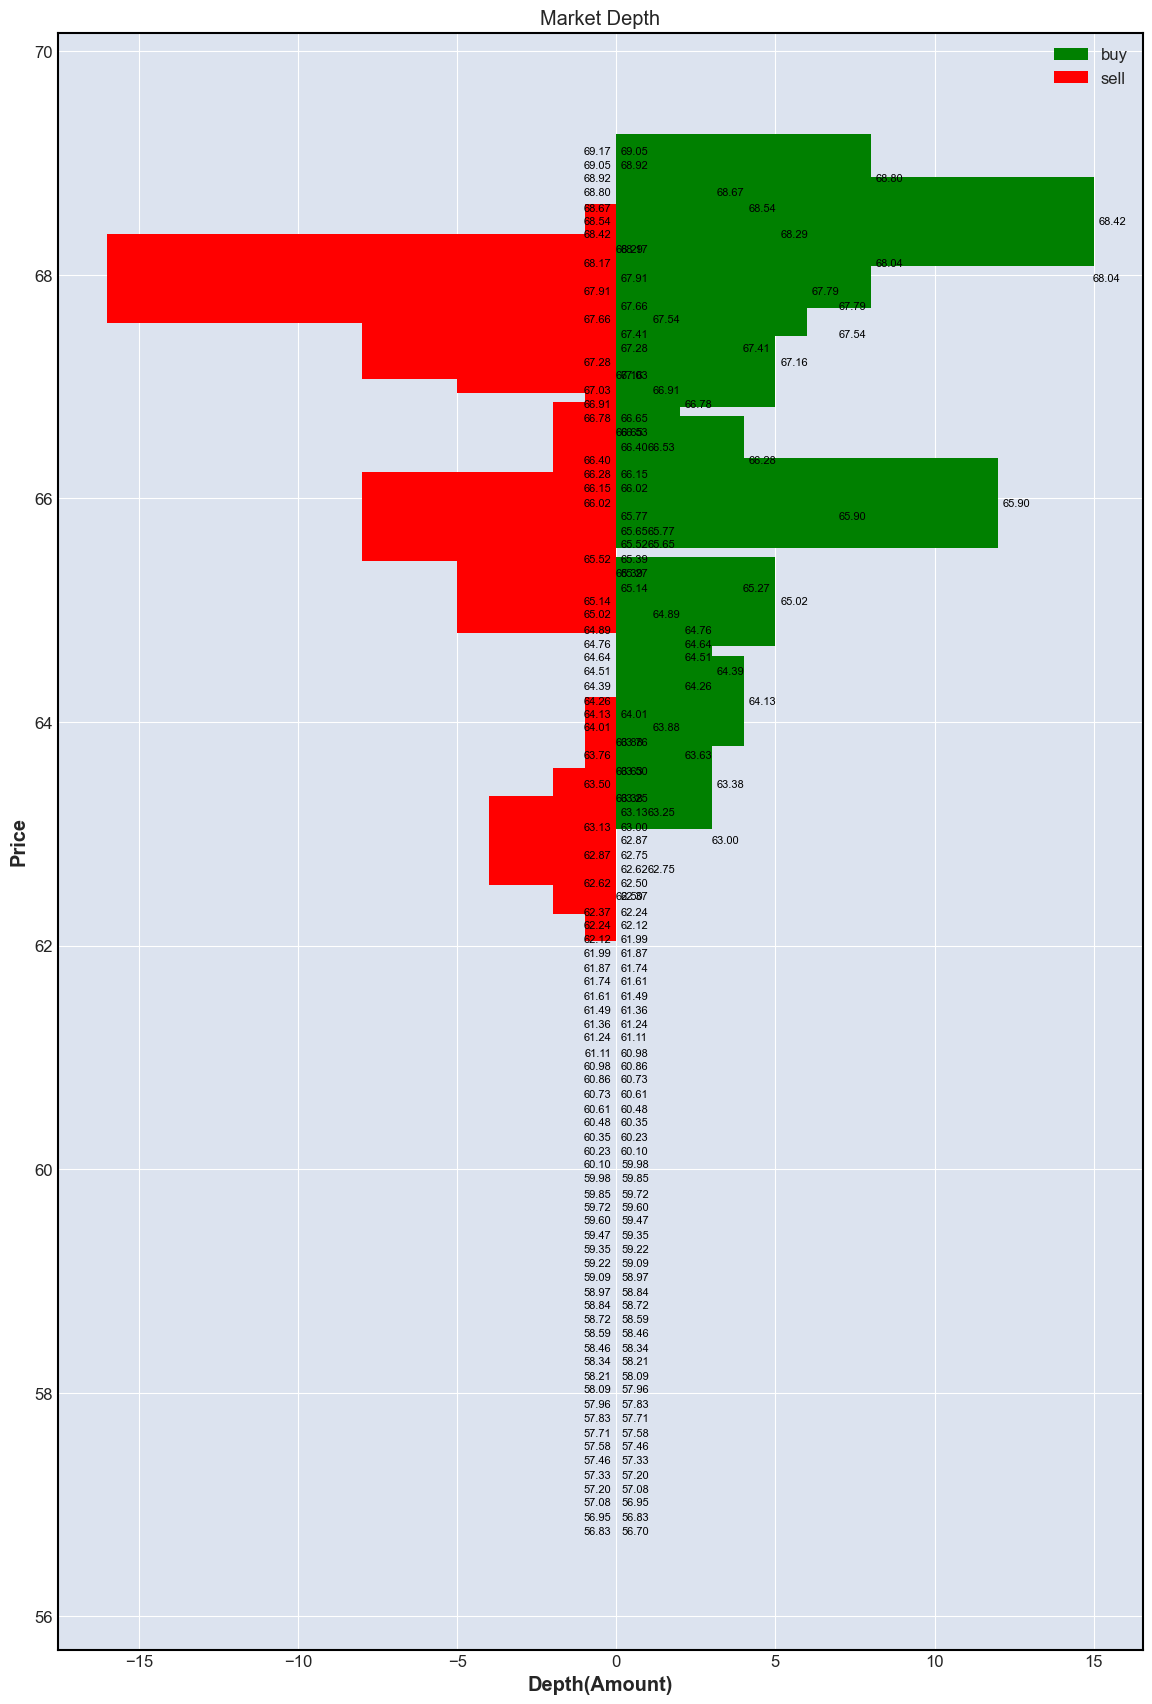

                                      DataFrame                                       
┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ 价格区间       ┃ 成交量 ┃ prop ┃ 价格  ┃ 起始价格 ┃ 终止价格 ┃ 买盘深度 ┃ 卖盘深度 ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ [62.37, 62.5)  │ 1753   │ -1   │ 62.44 │ 62.37    │ 62.5     │ 0        │ -1       │
│ [62.62, 62.75) │ 2392   │ -2   │ 62.68 │ 62.62    │ 62.75    │ 0        │ -2       │
│ [62.87, 63.0)  │ 7874   │ -4   │ 62.94 │ 62.87    │ 63.0     │ 0        │ -4       │
│ [63.13, 63.25) │ 2364   │ -2   │ 63.19 │ 63.13    │ 63.25    │ 0        │ -2       │
│ [63.25, 63.38) │ 8587   │ -1   │ 63.32 │ 63.25    │ 63.38    │ 0        │ -1       │
│ [63.38, 63.5)  │ 8753   │ 3    │ 63.44 │ 63.38    │ 63.5     │ 3        │ 0        │
│ [63.5, 63.63)  │ 13748  │ -1   │ 63.56 │ 63.5     │ 63.63    │ 0        │ -1       │
│ [63.63, 63.76) │ 8807   │ 2    │ 63.7  │ 63.63    │ 63.76    │ 2        │ 0        │
│ [63.76, 63.88) │ 6112   │ -1   │ 63.82 │ 63.76    │ 63.88    │ 0        │ -1       │
│ [63.88, 64.01) │ 24914  │ 1    │ 63.95 │ 63.88    │ 64.01    │ 1        │ 0        │
│ [64.13, 64.26) │ 4869   │ 4    │ 64.19 │ 64.13    │ 64.26    │ 4        │ 0        │
│ [64.26, 64.39) │ 3355   │ 2    │ 64.32 │ 64.26    │ 64.39    │ 2        │ 0        │
│ [64.39, 64.51) │ 7002   │ 3    │ 64.45 │ 64.39    │ 64.51    │ 3        │ 0        │
│ [64.51, 64.64) │ 3739   │ 2    │ 64.58 │ 64.51    │ 64.64    │ 2        │ 0        │
│ [64.64, 64.76) │ 1010   │ 2    │ 64.7  │ 64.64    │ 64.76    │ 2        │ 0        │
│ [64.76, 64.89) │ 1481   │ 2    │ 64.82 │ 64.76    │ 64.89    │ 2        │ 0        │
│ [64.89, 65.02) │ 14431  │ 1    │ 64.96 │ 64.89    │ 65.02    │ 1        │ 0        │
│ [65.02, 65.14) │ 13382  │ 5    │ 65.08 │ 65.02    │ 65.14    │ 5        │ 0        │
│ [65.14, 65.27) │ 18894  │ -5   │ 65.2  │ 65.14    │ 65.27    │ 0        │ -5       │
│ [65.27, 65.39) │ 10352  │ -1   │ 65.33 │ 65.27    │ 65.39    │ 0        │ -1       │
│ [65.52, 65.65) │ 27137  │ -2   │ 65.59 │ 65.52    │ 65.65    │ 0        │ -2       │
│ [65.65, 65.77) │ 18317  │ -2   │ 65.71 │ 65.65    │ 65.77    │ 0        │ -2       │
│ [65.77, 65.9)  │ 29602  │ -8   │ 65.84 │ 65.77    │ 65.9     │ 0        │ -8       │
│ [65.9, 66.02)  │ 36208  │ 12   │ 65.96 │ 65.9     │ 66.02    │ 12       │ 0        │
│ [66.28, 66.4)  │ 19468  │ 4    │ 66.34 │ 66.28    │ 66.4     │ 4        │ 0        │
│ [66.4, 66.53)  │ 19864  │ -2   │ 66.46 │ 66.4     │ 66.53    │ 0        │ -2       │
│ [66.53, 66.65) │ 24577  │ -1   │ 66.59 │ 66.53    │ 66.65    │ 0        │ -1       │
│ [66.78, 66.91) │ 35071  │ 2    │ 66.84 │ 66.78    │ 66.91    │ 2        │ 0        │
│ [66.91, 67.03) │ 52801  │ 1    │ 66.97 │ 66.91    │ 67.03    │ 1        │ 0        │
│ [67.03, 67.16) │ 25423  │ -1   │ 67.1  │ 67.03    │ 67.16    │ 0        │ -1       │
│ [67.16, 67.28) │ 17155  │ 5    │ 67.22 │ 67.16    │ 67.28    │ 5        │ 0        │
│ [67.28, 67.41) │ 23803  │ -5   │ 67.34 │ 67.28    │ 67.41    │ 0        │ -5       │
│ [67.41, 67.54) │ 25194  │ -8   │ 67.47 │ 67.41    │ 67.54    │ 0        │ -8       │
│ [67.54, 67.66) │ 22480  │ 1    │ 67.6  │ 67.54    │ 67.66    │ 1        │ 0        │
│ [67.66, 67.79) │ 12967  │ -8   │ 67.72 │ 67.66    │ 67.79    │ 0        │ -8       │
│ [67.79, 67.91) │ 21877  │ 6    │ 67.85 │ 67.79    │ 67.91    │ 6        │ 0        │
│ [67.91, 68.04) │ 81984  │ -16  │ 67.97 │ 67.91    │ 68.04    │ 0        │ -16      │
│ [68.04, 68.17) │ 31914  │ 8    │ 68.1  │ 68.04    │ 68.17    │ 8        │ 0        │
│ [68.17, 68.29) │ 24247  │ -1   │ 68.23 │ 68.17    │ 68.29    │ 0        │ -1       │
│ [68.29, 68.42) │ 28033  │ 5    │ 68.36 │ 68.29    │ 68.42    │ 5        │ 0        │
│ [68.42, 68.54) │ 33652  │ 15   │ 68.48 │ 68.42    │ 68.54    │ 15       │ 0        │
│ [68.54, 68.67) │ 20629  │ 4    │ 68.6  │ 68.54    │ 68.67    │ 4        │ 0        │
│ [68.67, 68.8)  │ 3098

中南股份-周期：daily
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1997-05-08  000717  15.00  15.08  16.50  14.88   404038  6.229113e+08   
1     1997-05-09  000717  15.20  15.31  15.59  14.65   101964  1.543605e+08   
2     1997-05-12  000717  15.50  16.16  16.48  15.35   114675  1.825065e+08   
3     1997-05-13  000717  16.00  15.33  16.10  15.00    55829  8.628832e+07   
4     1997-05-14  000717  15.20  14.92  15.70  14.70    45290  6.859488e+07   
...          ...     ...    ...    ...    ...    ...      ...           ...   
6493  2024-10-24  000717   2.83   2.73   2.83   2.68  1216748  3.312953e+08   
6494  2024-10-25  000717   2.74   2.74   2.80   2.69   932630  2.555370e+08   
6495  2024-10-28  000717   2.86   3.01   3.01   2.81  1206086  3.566353e+08   
6496  2024-10-29  000717   3.16   2.89   3.17   2.88  2336638  7.106454e+08   
6497  2024-10-30  000717   2.82   2.90   2.99   2.78   724231  2.095872e+08   

         振幅    涨跌幅   涨跌额    换手率  
0  

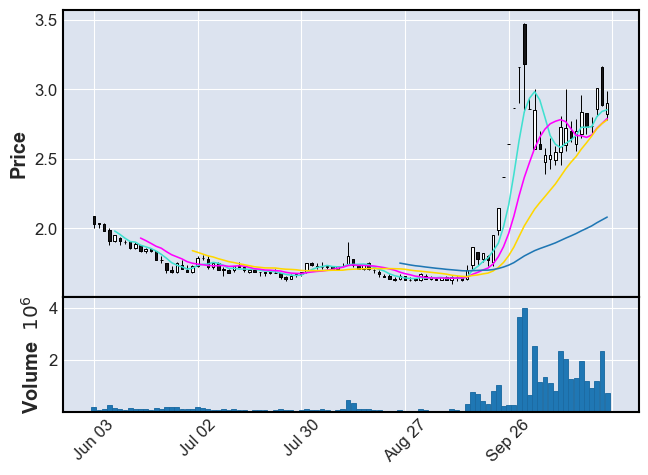

中南股份-周期：weekly
              日期    股票代码     开盘     收盘     最高     最低      成交量           成交额  \
0     1997-05-09  000717  15.00  15.31  16.50  14.65   506002  7.772718e+08   
1     1997-05-16  000717  15.50  13.65  16.48  13.64   276068  4.250346e+08   
2     1997-05-23  000717  13.75  11.93  14.25  11.23    91812  1.190401e+08   
3     1997-05-30  000717  12.00  12.33  12.58  11.11    77878  9.439885e+07   
4     1997-06-06  000717  12.60  11.70  13.78  11.48   108740  1.383512e+08   
...          ...     ...    ...    ...    ...    ...      ...           ...   
1363  2024-09-30  000717   3.16   3.16   3.16   2.90  3654131  1.141710e+09   
1364  2024-10-11  000717   3.47   2.57   3.48   2.57  8377505  2.496490e+09   
1365  2024-10-18  000717   2.48   2.72   3.00   2.39  7666889  2.016260e+09   
1366  2024-10-25  000717   2.70   2.74   2.96   2.56  6728348  1.840610e+09   
1367  2024-10-30  000717   2.86   2.89   3.17   2.78  4267023  1.276888e+09   

         振幅    涨跌幅   涨跌额    换手率  
0 

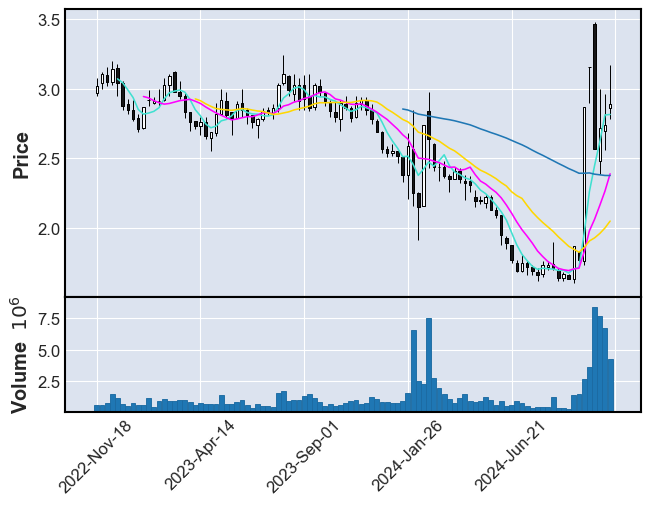

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [70]:
focusStocks=['300576','600839','600157','000717','002607','600127','600605','600217','300727','301421','002843','600968','300159']
stockCharts,marketDepths={},{}

for f in focusStocks:
    print('='*75)
    stockCharts[f]=plotDcStocks(f,periods)
    stockname=stockCharts[f]['name']
    print(f'{stockname}（{f}）的市场深度：')
    marketDepths[f]=plotActiveMarketDepth(f)
    